start
x_s_ratio


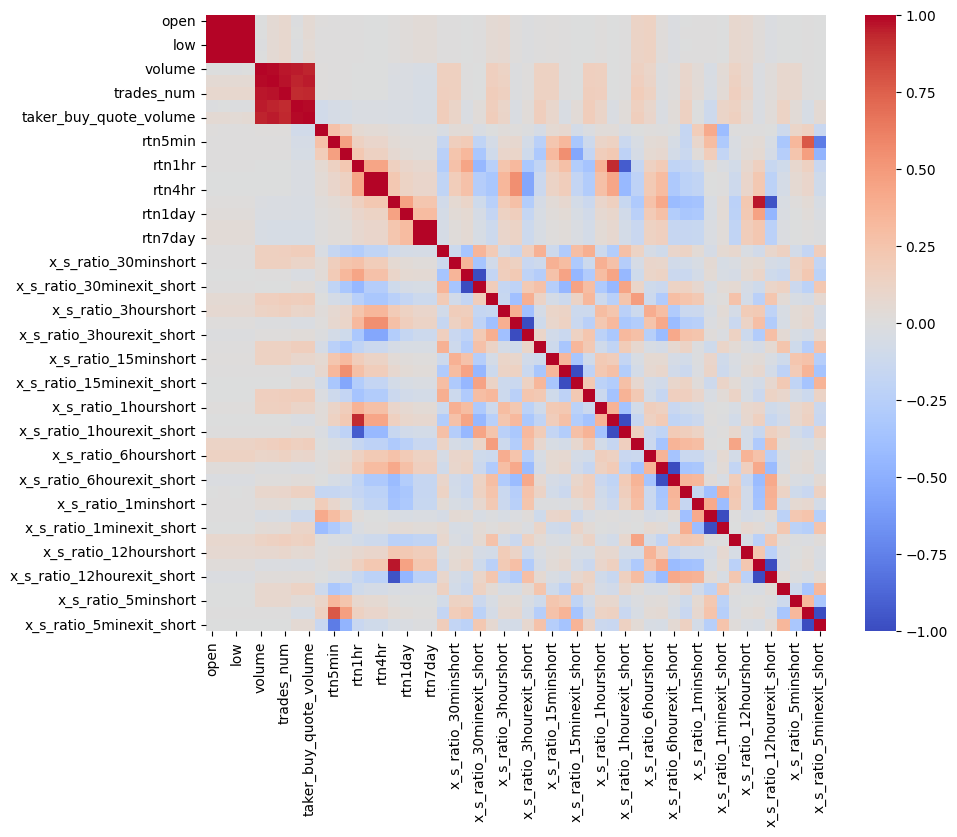

liquidity_v2


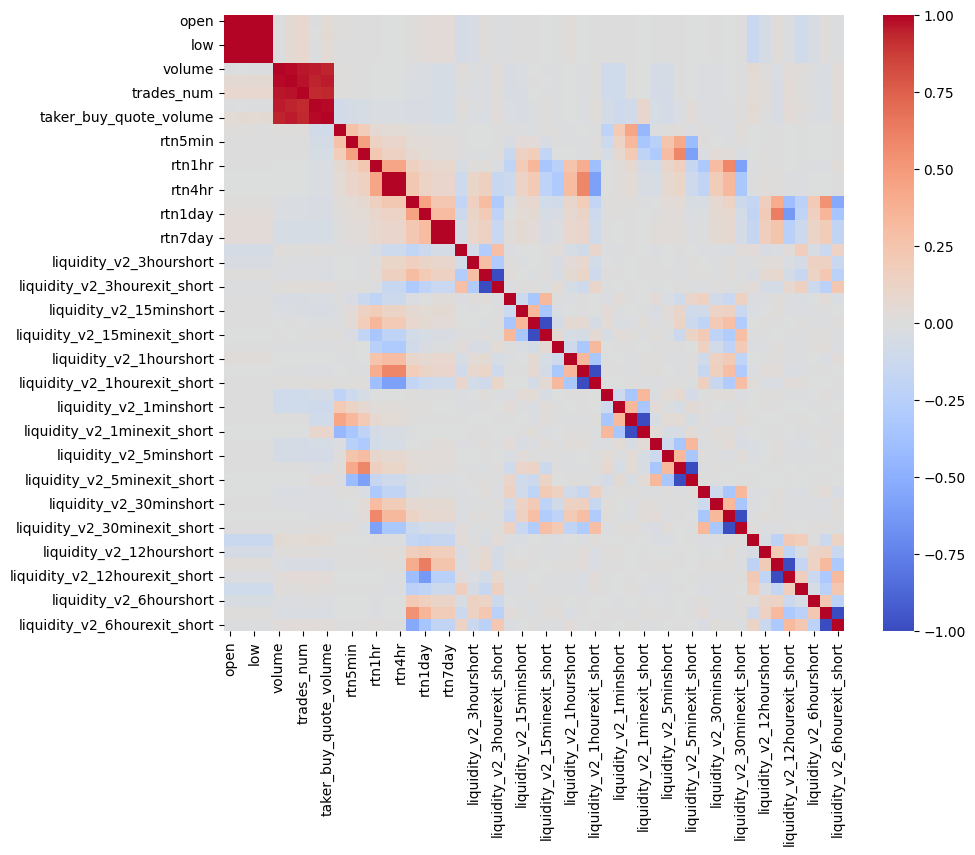

rsi


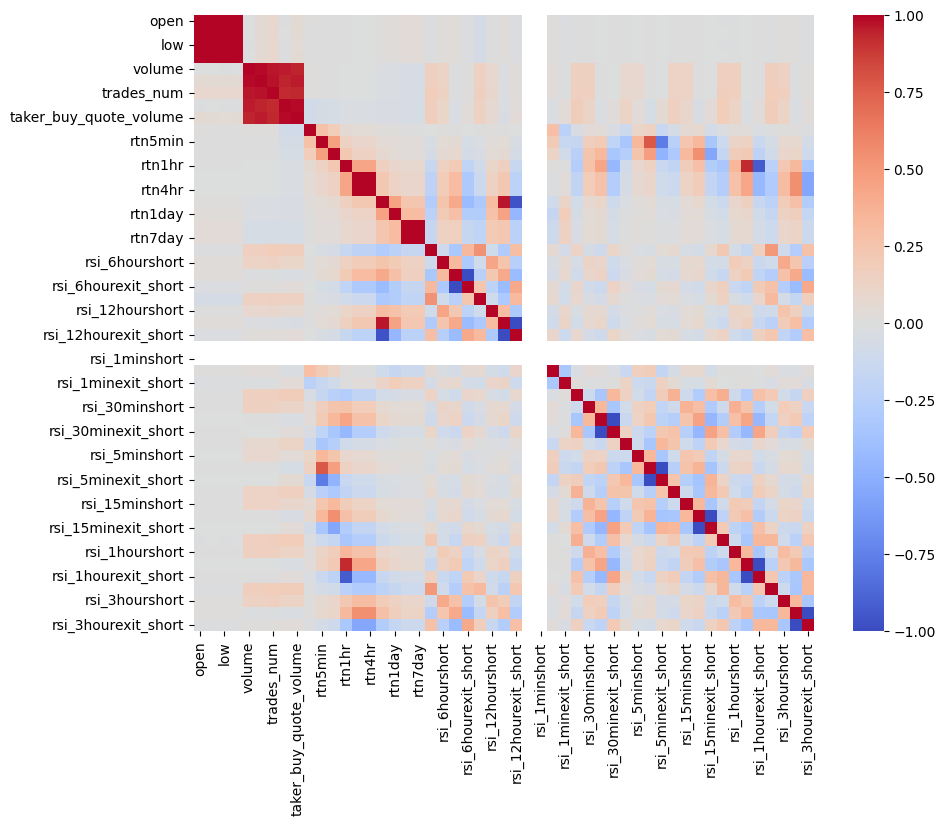

volatility_v1


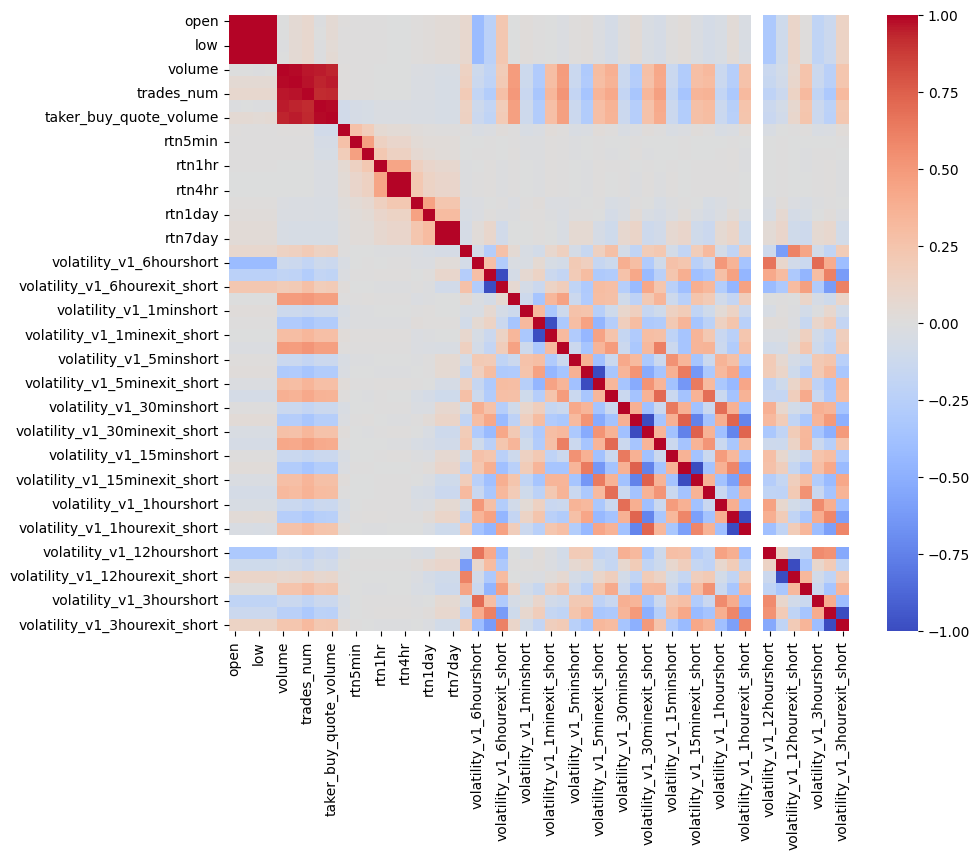

amount_srpead


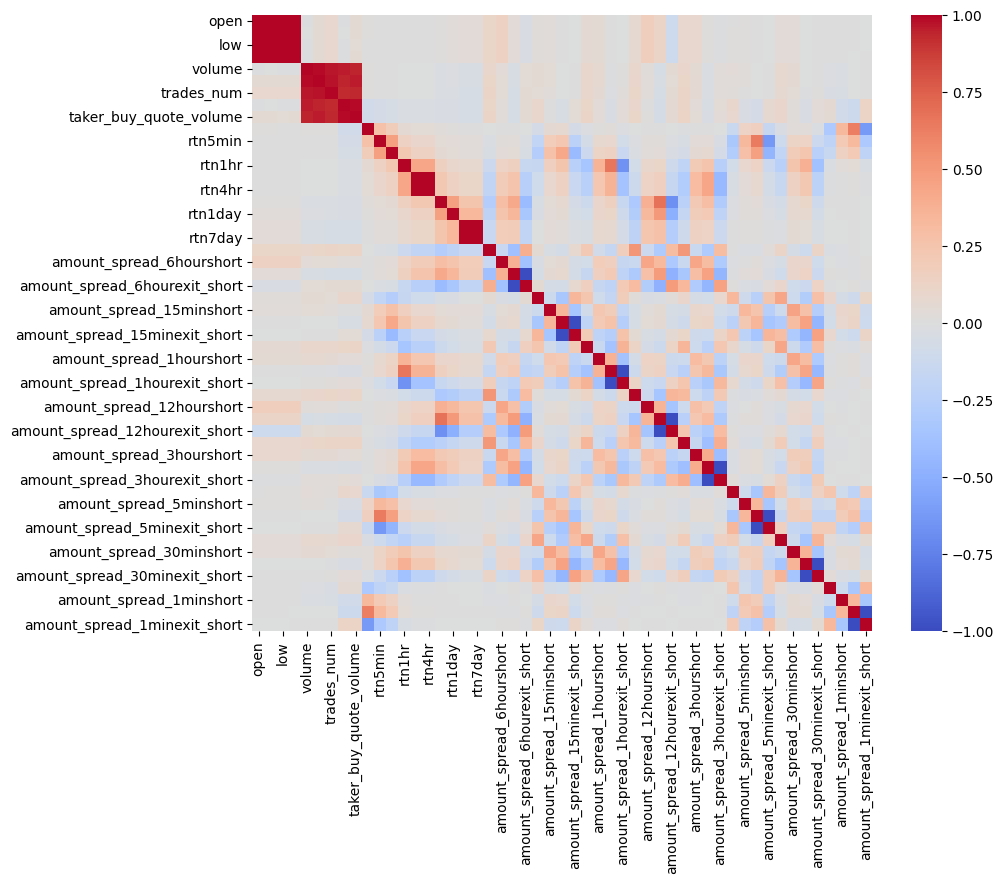

price_vol_corr


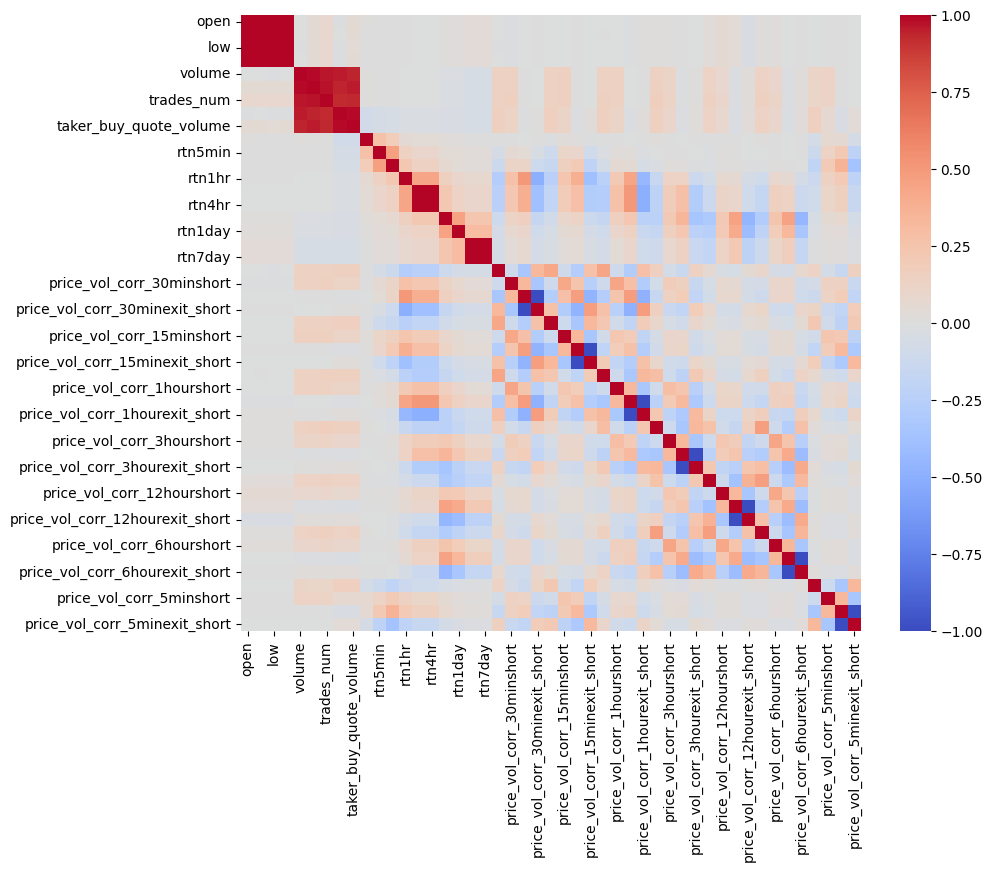

high_low_dd


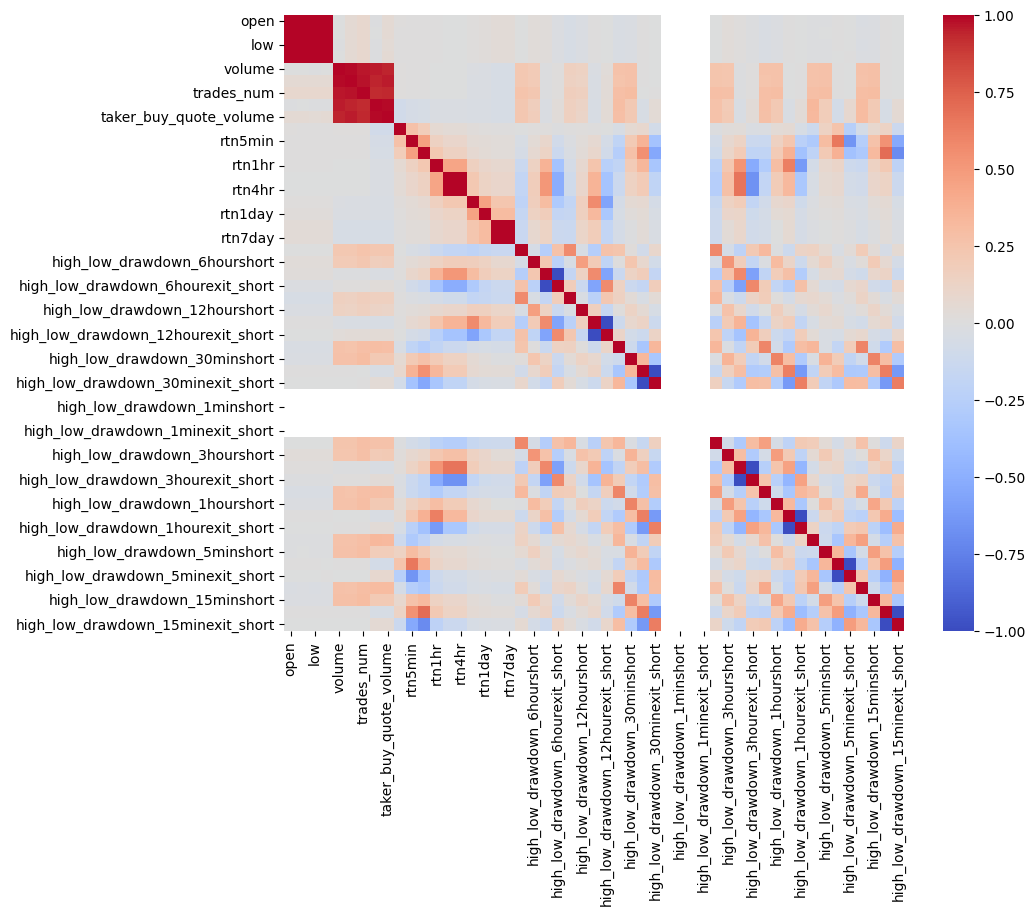

rtn_entropy


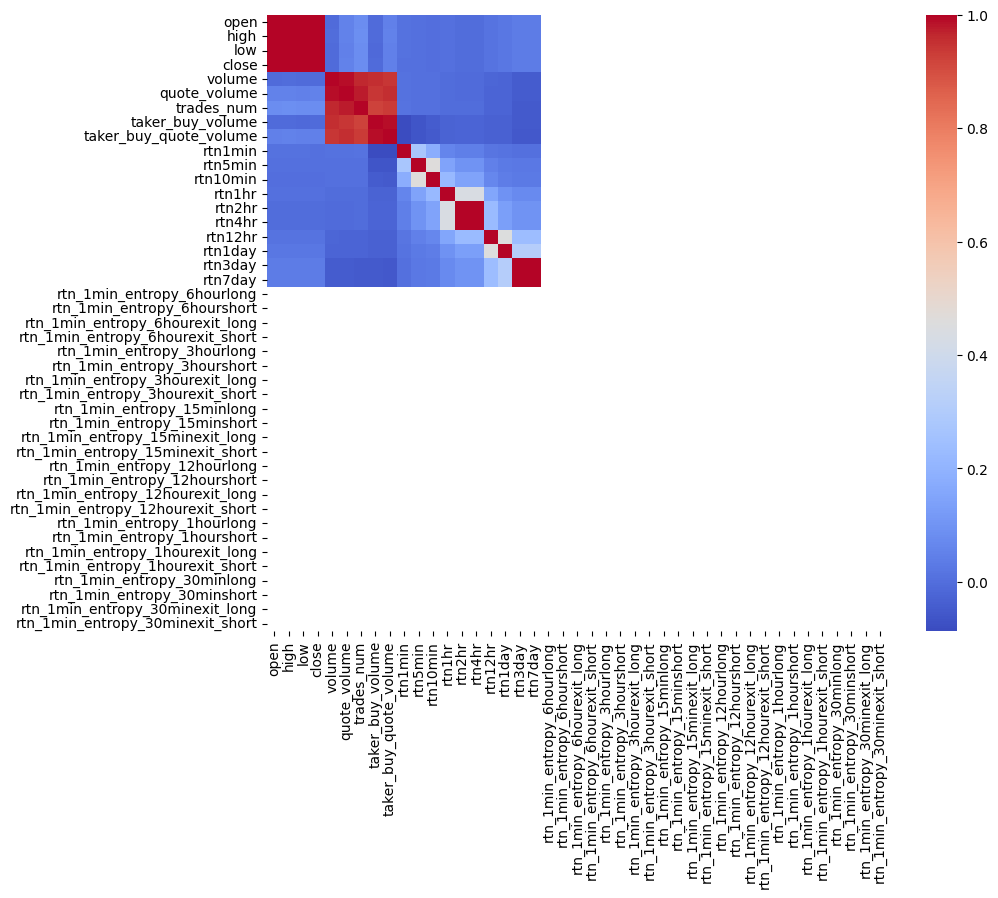

volatility_v0_convexity


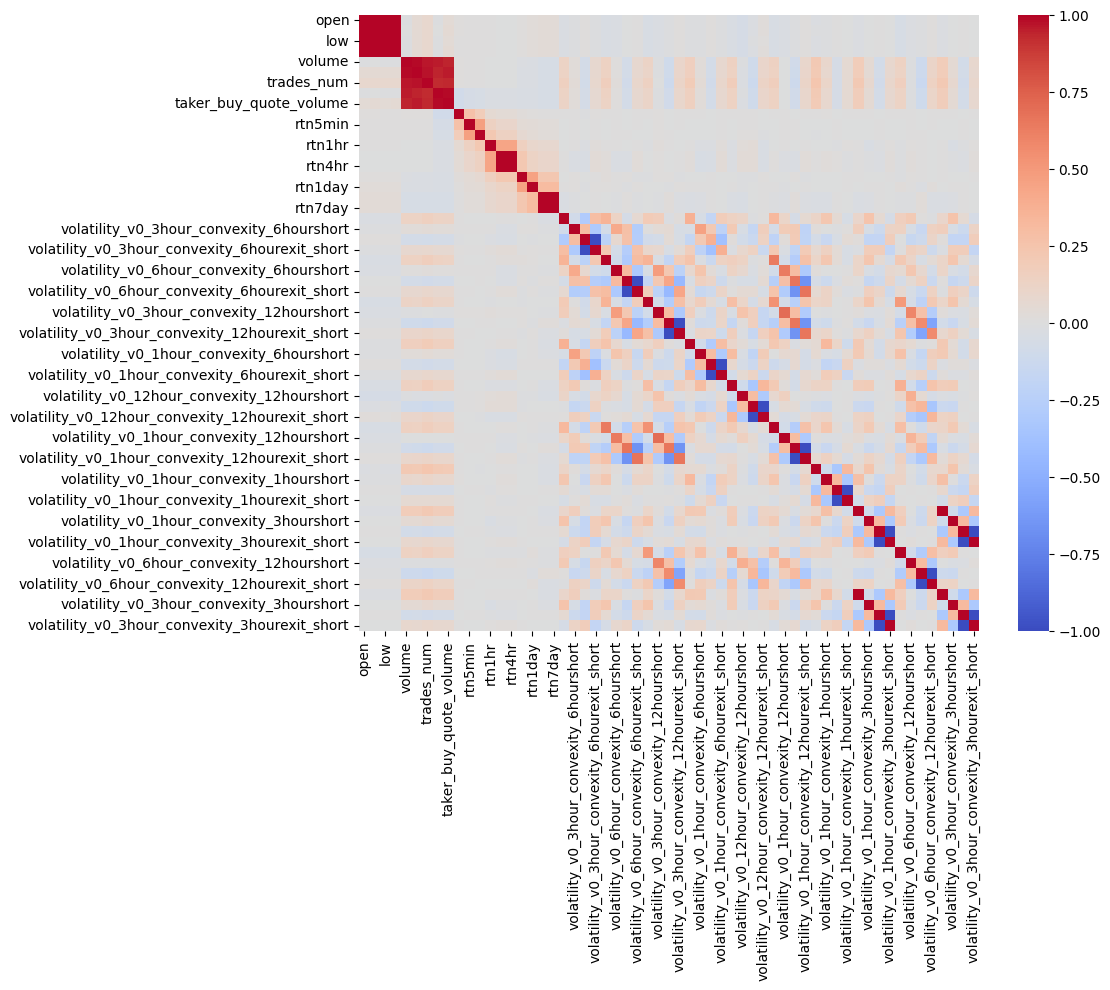

liquidity_v1


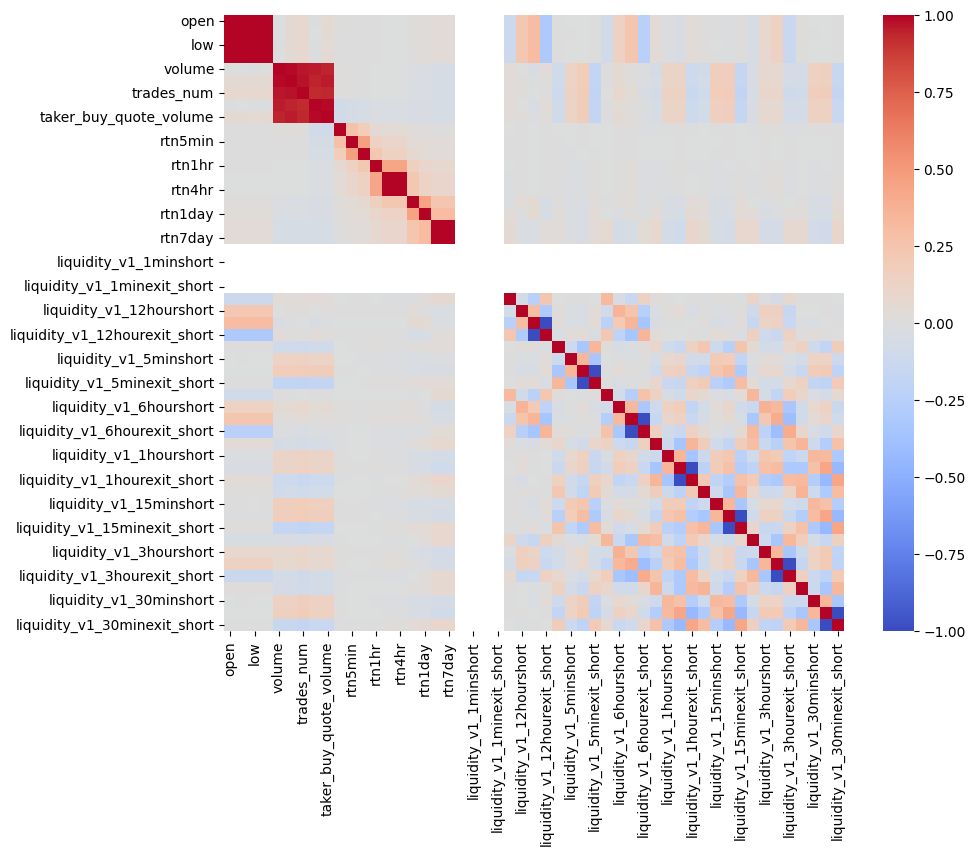

bar_rtn_sum


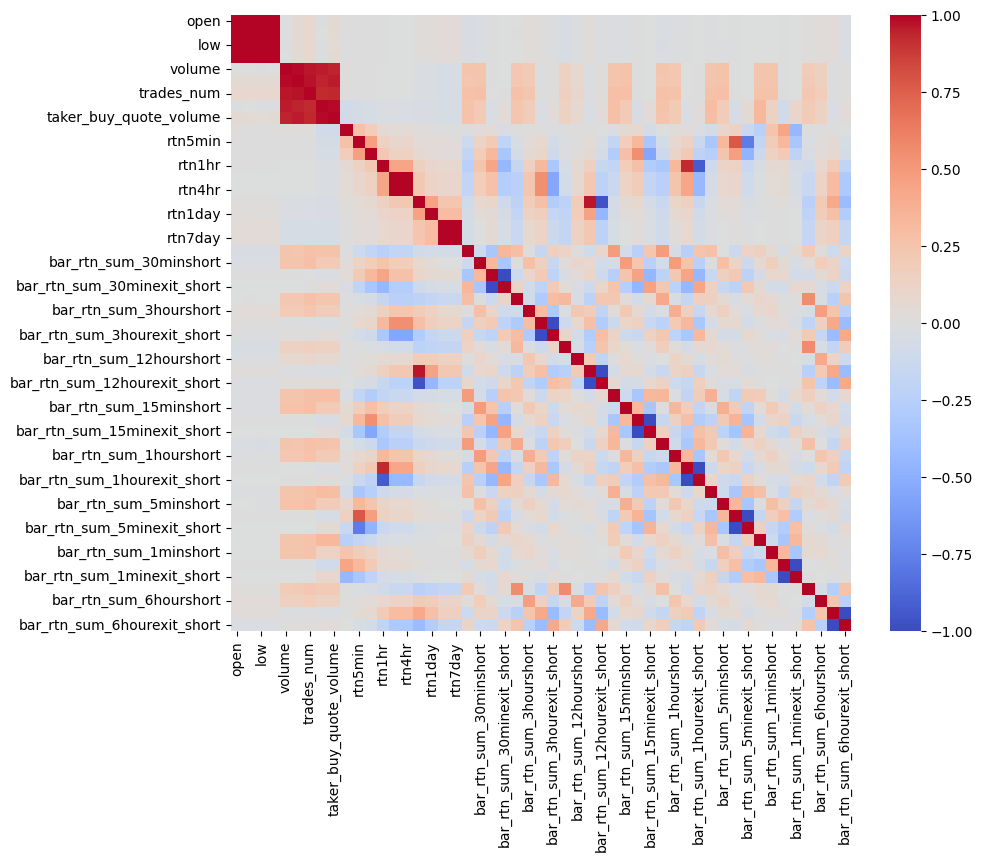

zscore


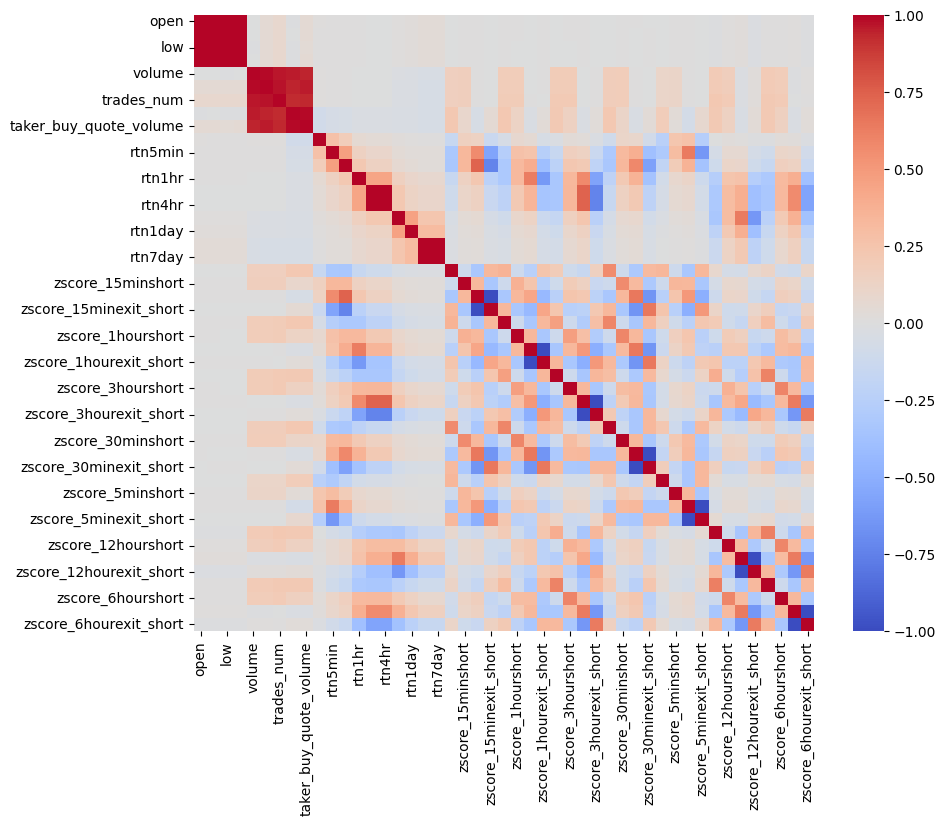

liquidity_v0


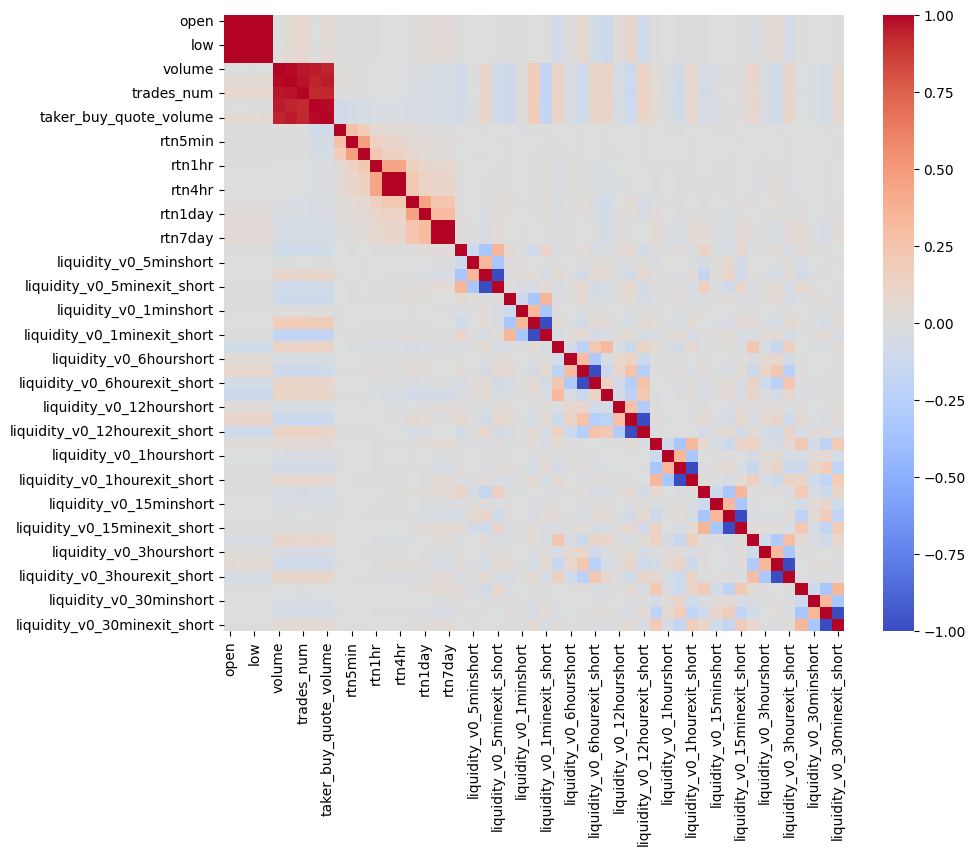

volatility_v1_sl_ratio


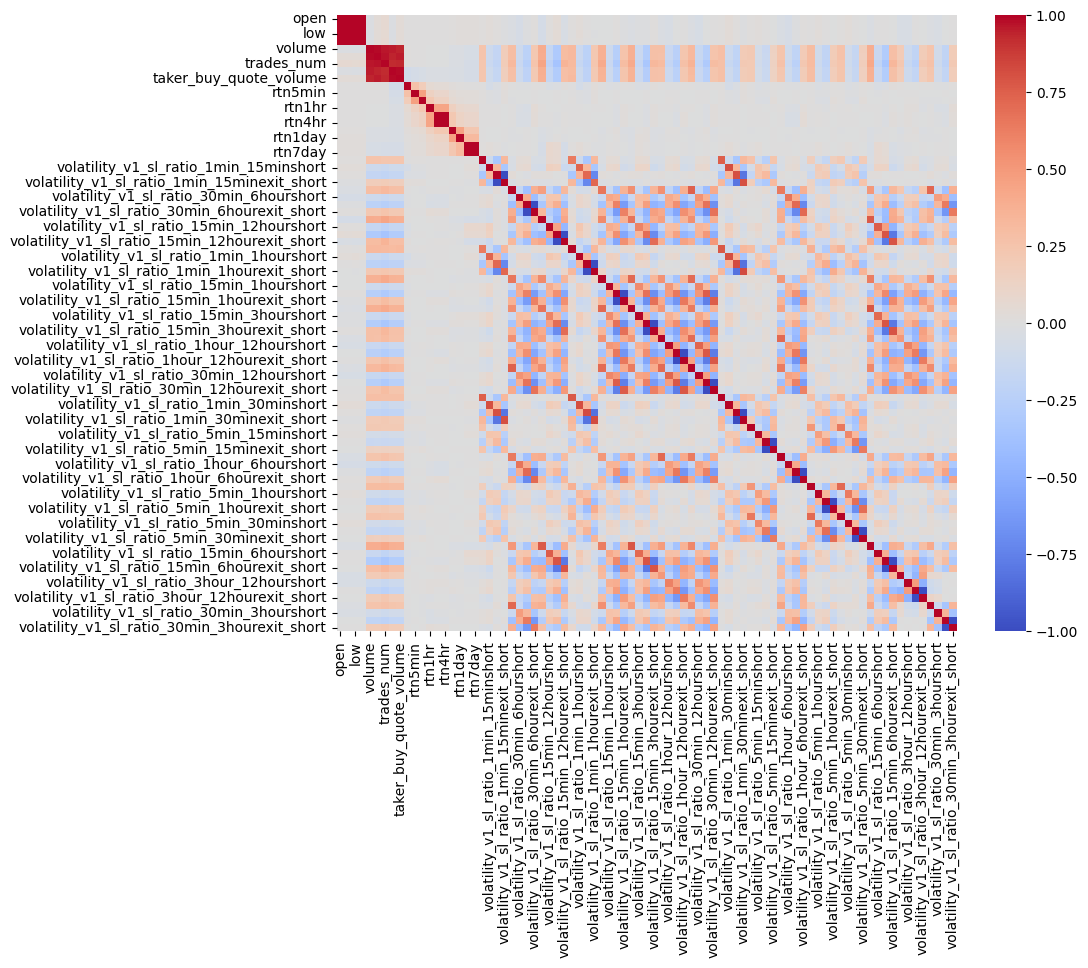

volatility_v0_sl_ratio


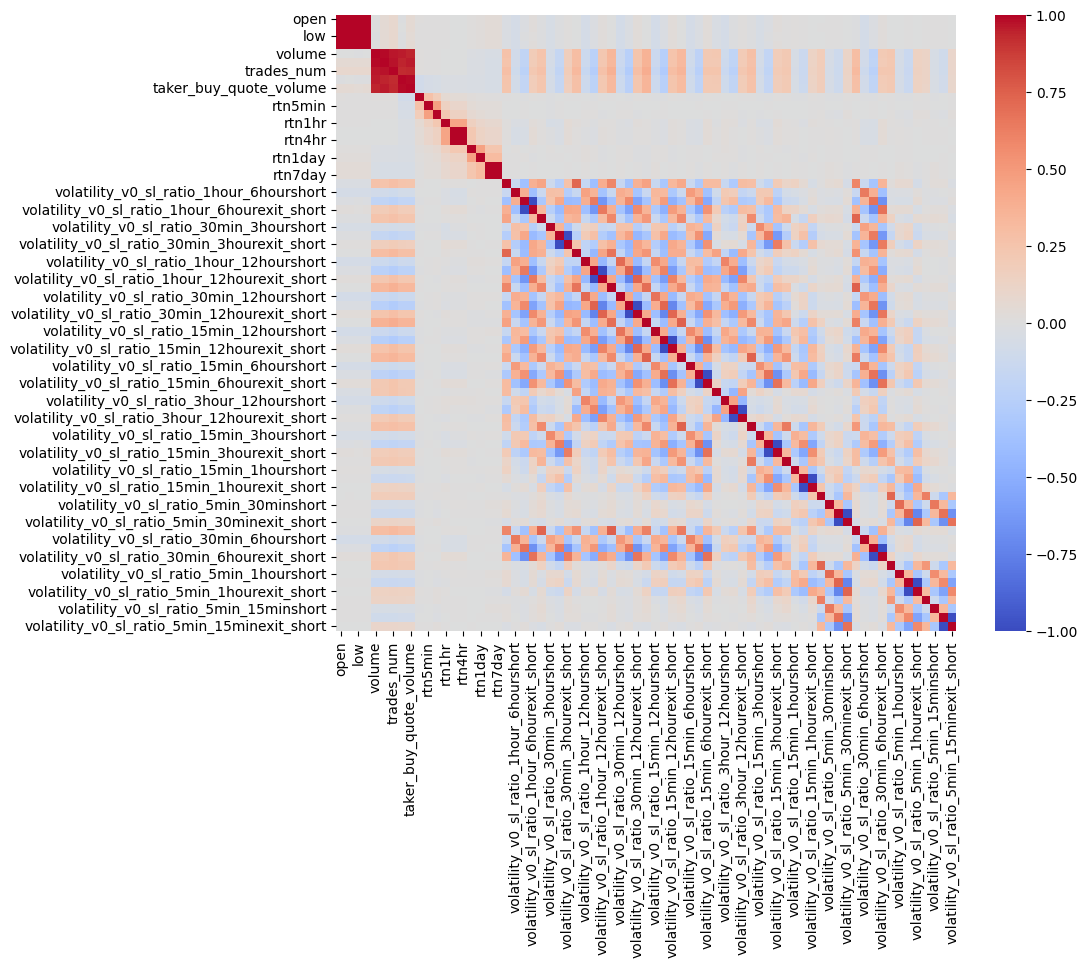

high_low_dis


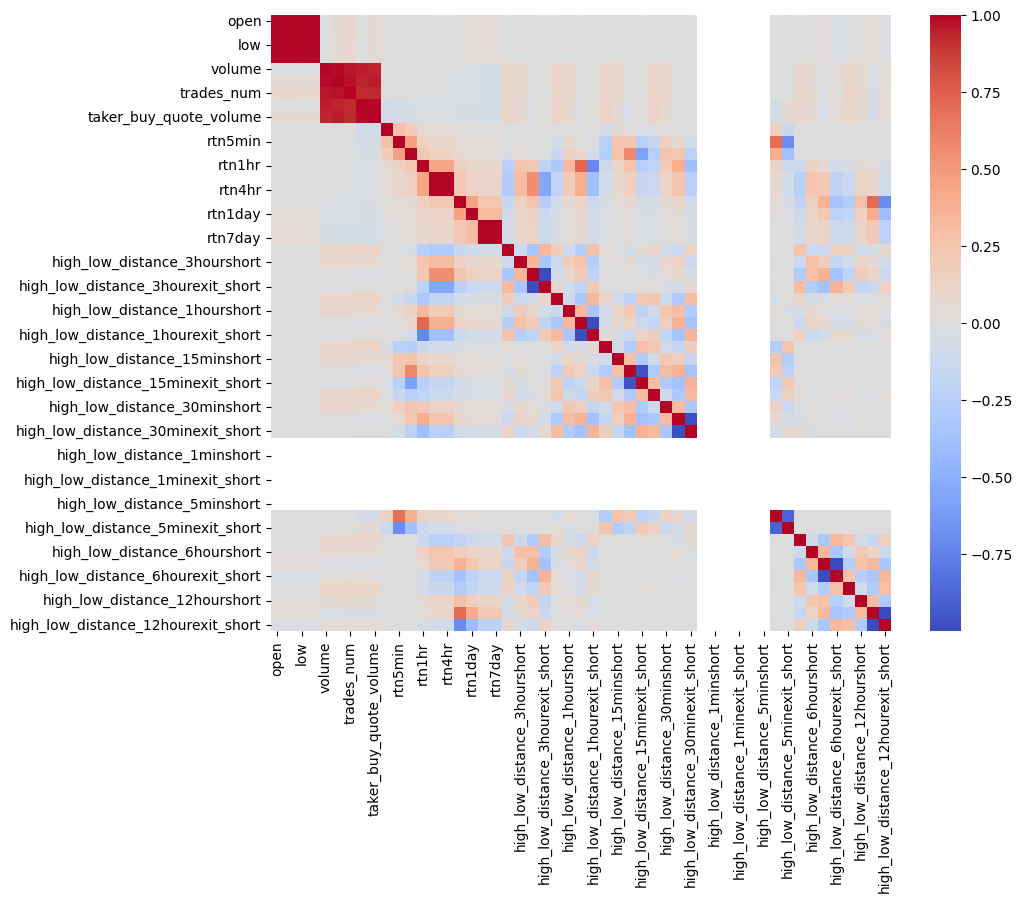

volatility_0


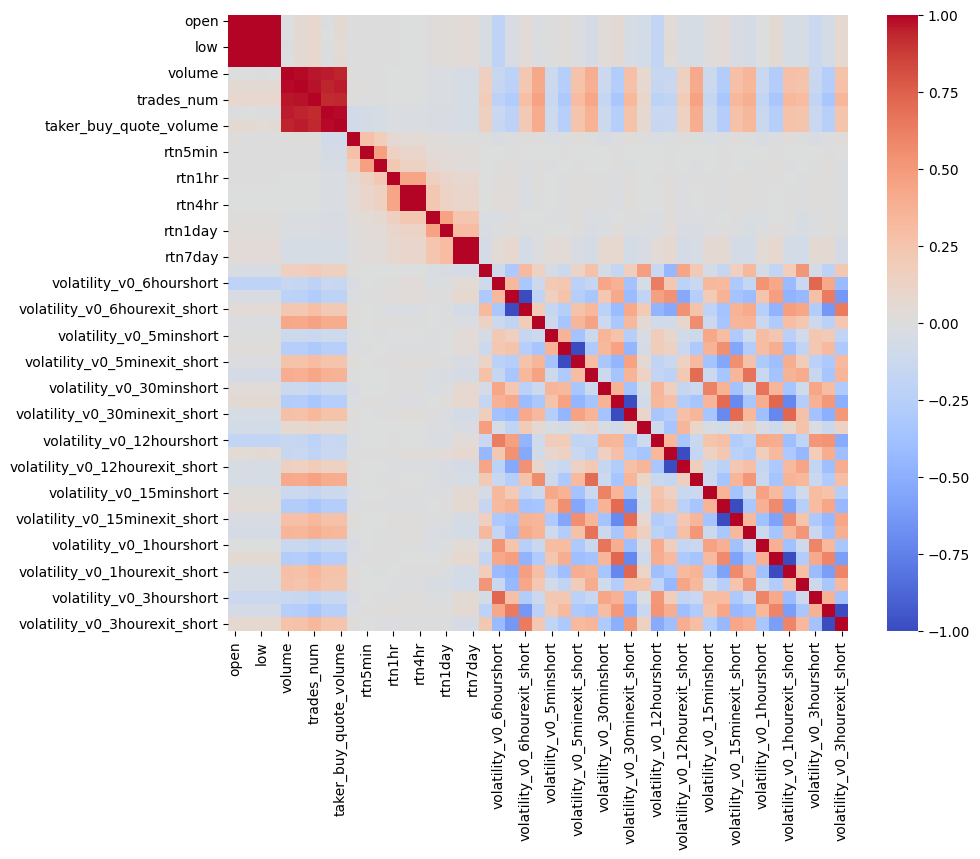

mom


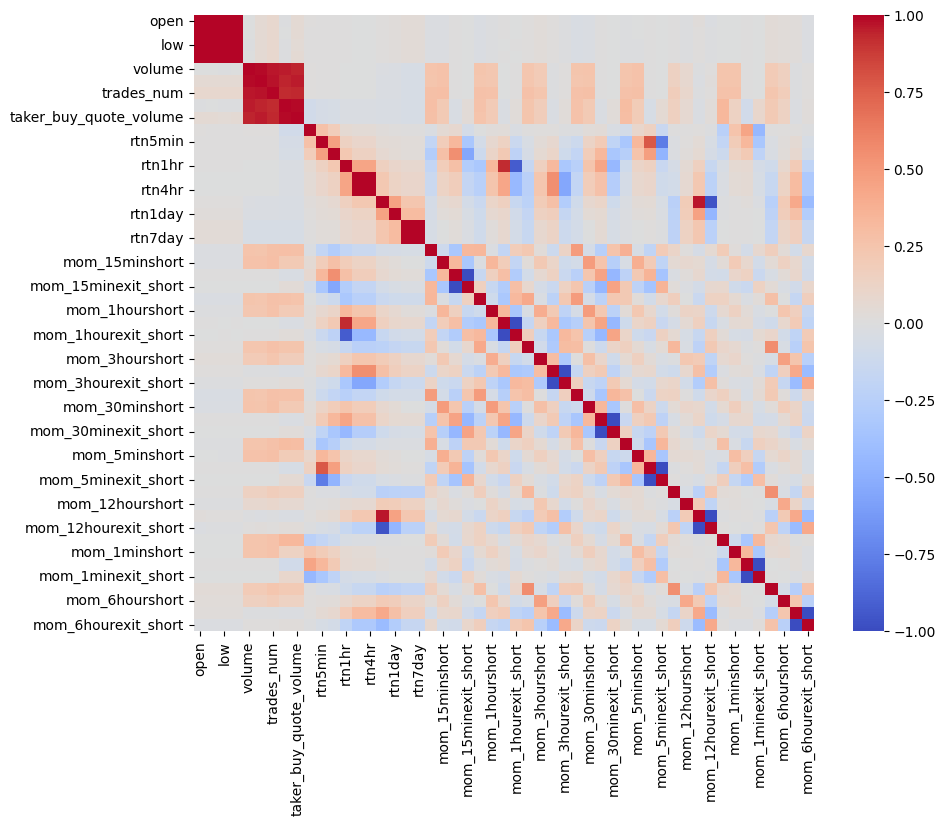

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_hdf('BTCUSDT_PERPETUAL.h5')
data['rtn1min'] = np.where(data['close'].shift(1) - data['close'] > 0, 1, 0)
data['rtn5min'] = np.where(data['close'].shift(5) - data['close'] > 0, 1, 0)
data['rtn10min'] = np.where(data['close'].shift(10) - data['close'] > 0, 1, 0)
data['rtn1hr'] = np.where(data['close'].shift(60) - data['close'] > 0, 1, 0)
data['rtn2hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn4hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn12hr'] = np.where(data['close'].shift(60*12) - data['close'] > 0, 1, 0)
data['rtn1day'] = np.where(data['close'].shift(60*24) - data['close'] > 0, 1, 0)
data['rtn3day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)
data['rtn7day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)

factor_database = '/Users/johnsonhsiao/ML_Fintech/final_project/因子回測結果/'
factor_list = os.listdir(factor_database)
factor_list.remove('.DS_Store')

for factor in factor_list:
    print(factor)
    prepared_data = [data]
    factor_with_diff_lbp = os.listdir(f'{factor_database}{factor}')
    try:
        for factor_lbp in factor_with_diff_lbp:
            factor_data = pd.read_hdf(f'{factor_database}{factor}/{factor_lbp}')
#             factor_data = factor_data.to_frame()
            factor_data = factor_data.drop(columns='pnl')
            factor_data = factor_data.dropna()
            factor_data = factor_data.replace({True: 1, False: 0})
#             factor_data = factor_data.rename(columns={factor_data.columns[0]: factor_lbp.split('.h5')[0]})
            factor_data.columns = [factor_lbp.split('.h5')[0] + col for col in factor_data.columns]
            prepared_data.append(factor_data)
        output = pd.concat(prepared_data,axis=1)
        output = output.dropna()
        data_subset = output.drop(['close_time'], axis=1)
        correlation = data_subset.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation, cmap='coolwarm')
        plt.show()
    except Exception as e:
        pass


In [ ]:
data = pd.read_hdf('BTCUSDT_PERPETUAL.h5')
data['rtn1min'] = np.where(data['close'].shift(1) - data['close'] > 0, 1, 0)
data['rtn5min'] = np.where(data['close'].shift(5) - data['close'] > 0, 1, 0)
data['rtn10min'] = np.where(data['close'].shift(10) - data['close'] > 0, 1, 0)
data['rtn1hr'] = np.where(data['close'].shift(60) - data['close'] > 0, 1, 0)
data['rtn2hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn4hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn12hr'] = np.where(data['close'].shift(60*12) - data['close'] > 0, 1, 0)
data['rtn1day'] = np.where(data['close'].shift(60*24) - data['close'] > 0, 1, 0)
data['rtn3day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)
data['rtn7day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)
data

open      high       low     close   volume  \
open_time                                                              
2020-12-31 16:00:00  28792.58  28837.77  28782.46  28832.70  293.514   
2020-12-31 16:01:00  28832.69  28836.72  28733.12  28746.85  313.979   
2020-12-31 16:02:00  28748.05  28760.00  28700.47  28715.85  350.483   
2020-12-31 16:03:00  28714.66  28739.75  28706.00  28711.42  199.614   
2020-12-31 16:04:00  28711.43  28749.21  28700.00  28735.53  225.339   
...                       ...       ...       ...       ...      ...   
2023-10-22 23:55:00  29954.40  29957.20  29951.70  29954.10   82.966   
2023-10-22 23:56:00  29954.20  29963.90  29953.90  29963.90   58.943   
2023-10-22 23:57:00  29963.90  29965.00  29962.10  29964.90   53.733   
2023-10-22 23:58:00  29964.90  29977.10  29964.90  29977.10   68.297   
2023-10-22 23:59:00  29977.10  29981.50  29965.80  29981.50   61.841   

                                 close_time  quote_volume  trades_num  \
open_time                                                               
2020-12-31 16:00:00 2020-12-31 16:00:59.999  8.456309e+06        2280   
2020-12-31 16:01:00 2020-12-31 16:01:59.999  9.037019e+06        2529   
2020-12-31 16:02:00 2020-12-31 16:02:59.999  1.006867e+07        2600   
2020-12-31 16:03:00 2020-12-31 16:03:59.999  5.733296e+06        1514   
2020-12-31 16:04:00 2020-12-31 16:04:59.999  6.471661e+06        1767   
...                                     ...           ...         ...   
2023-10-22 23:55:00 2023-10-22 23:55:59.999  2.485232e+06        1385   
2023-10-22 23:56:00 2023-10-22 23:56:59.999  1.765736e+06        1014   
2023-10-22 23:57:00 2023-10-22 23:57:59.999  1.610041e+06         651   
2023-10-22 23:58:00 2023-10-22 23:58:59.999  2.046934e+06        1292   
2023-10-22 23:59:00 2023-10-22 23:59:59.999  1.853692e+06        1550   

                     taker_buy_volume  taker_buy_quote_volume  rtn1min  \
open_time                                                                
2020-12-31 16:00:00           159.698            4.601449e+06        0   
2020-12-31 16:01:00            70.785            2.037393e+06        1   
2020-12-31 16:02:00           109.508            3.146607e+06        1   
2020-12-31 16:03:00            75.826            2.178253e+06        1   
2020-12-31 16:04:00           116.240            3.339144e+06        0   
...                               ...                     ...      ...   
2023-10-22 23:55:00            31.193            9.343653e+05        1   
2023-10-22 23:56:00            26.136            7.829587e+05        0   
2023-10-22 23:57:00            27.592            8.267547e+05        0   
2023-10-22 23:58:00            45.155            1.353332e+06        0   
2023-10-22 23:59:00            26.117            7.828523e+05        0   

                     rtn5min  rtn10min  rtn1hr  rtn2hr  rtn4hr  rtn12hr  \
open_time                                                                 
2020-12-31 16:00:00        0         0       0       0       0        0   
2020-12-31 16:01:00        0         0       0       0       0        0   
2020-12-31 16:02:00        0         0       0       0       0        0   
2020-12-31 16:03:00        0         0       0       0       0        0   
2020-12-31 16:04:00        0         0       0       0       0        0   
...                      ...       ...     ...     ...     ...      ...   
2023-10-22 23:55:00        1         1       1       0       0        0   
2023-10-22 23:56:00        1         1       1       0       0        0   
2023-10-22 23:57:00        1         1       1       0       0        0   
2023-10-22 23:58:00        1         0       1       0       0        0   
2023-10-22 23:59:00        0         0       1       0       0        0   

                     rtn1day  rtn3day  rtn7day  
open_time                                       
2020-12-31 16:00:00        0        0        0  
2020-12-31 16:01:00        0        0        0  
202

<AxesSubplot:xlabel='open_time'>

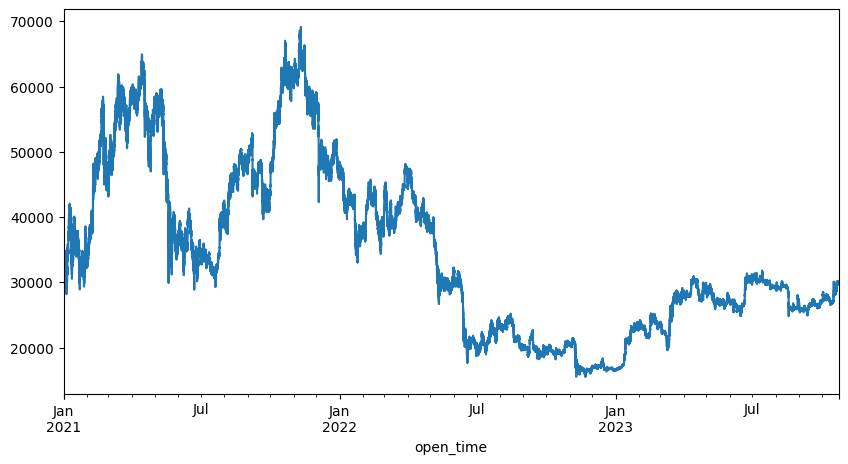

In [ ]:
data = pd.read_hdf('BTCUSDT_PERPETUAL.h5')
data['rtn1min'] = np.where(data['close'].shift(1) - data['close'] > 0, 1, 0)
data['rtn5min'] = np.where(data['close'].shift(5) - data['close'] > 0, 1, 0)
data['rtn10min'] = np.where(data['close'].shift(10) - data['close'] > 0, 1, 0)
data['rtn1hr'] = np.where(data['close'].shift(60) - data['close'] > 0, 1, 0)
data['rtn2hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn4hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn12hr'] = np.where(data['close'].shift(60*12) - data['close'] > 0, 1, 0)
data['rtn1day'] = np.where(data['close'].shift(60*24) - data['close'] > 0, 1, 0)
data['rtn3day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)
data['rtn7day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)

plt.figure(figsize=(10, 5))
data['close'].plot()

In [ ]:
candidate = ['x_s_ratio','liquidity_v2','rsi','amount_spread',
             'price_vol_corr','high_low_dd','bar_rtn_sum','zscore','high_low_dis','mom']

x_s_ratio_30min.h5
x_s_ratio_3hour.h5
x_s_ratio_15min.h5
x_s_ratio_1hour.h5
x_s_ratio_6hour.h5
x_s_ratio_1min.h5
x_s_ratio_12hour.h5
x_s_ratio_1day.h5
x_s_ratio_5min.h5


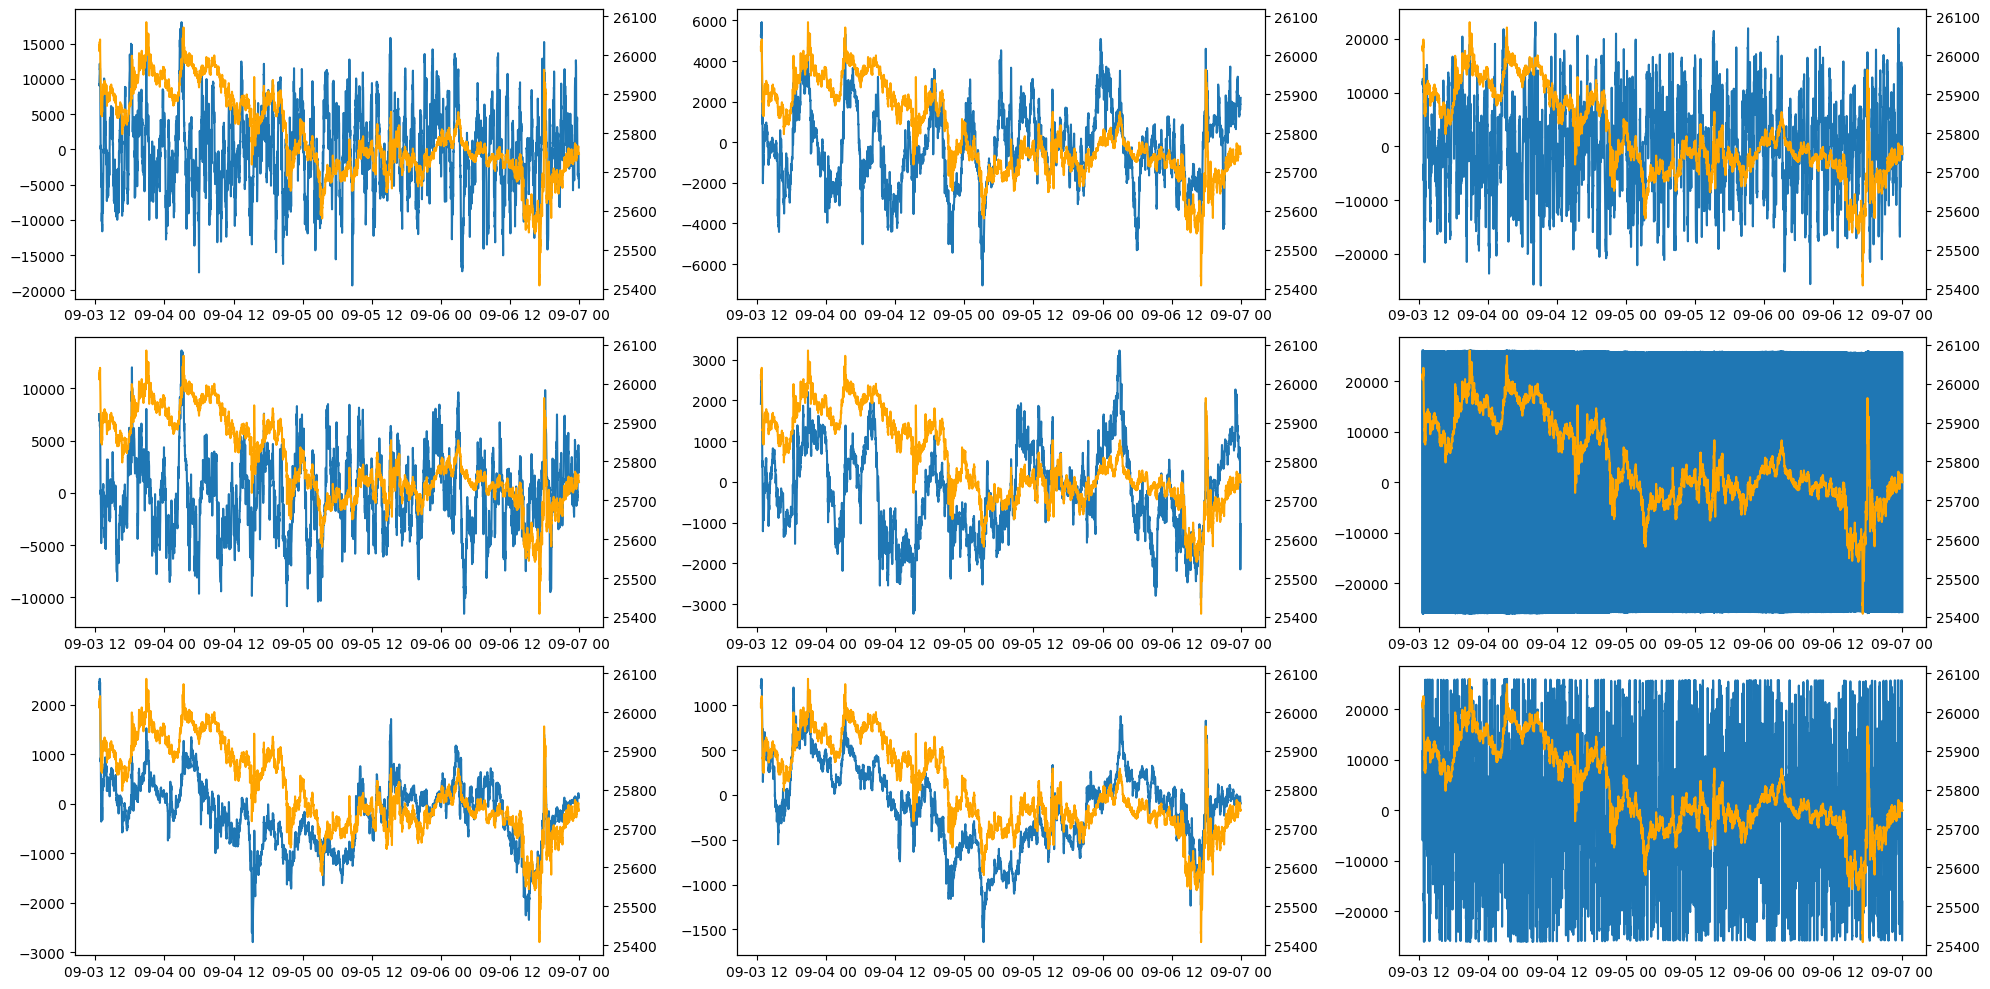

liquidity_v2_3hour.h5
liquidity_v2_15min.h5
liquidity_v2_1hour.h5
liquidity_v2_1day.h5
liquidity_v2_1min.h5
liquidity_v2_5min.h5
liquidity_v2_30min.h5
liquidity_v2_12hour.h5
liquidity_v2_6hour.h5


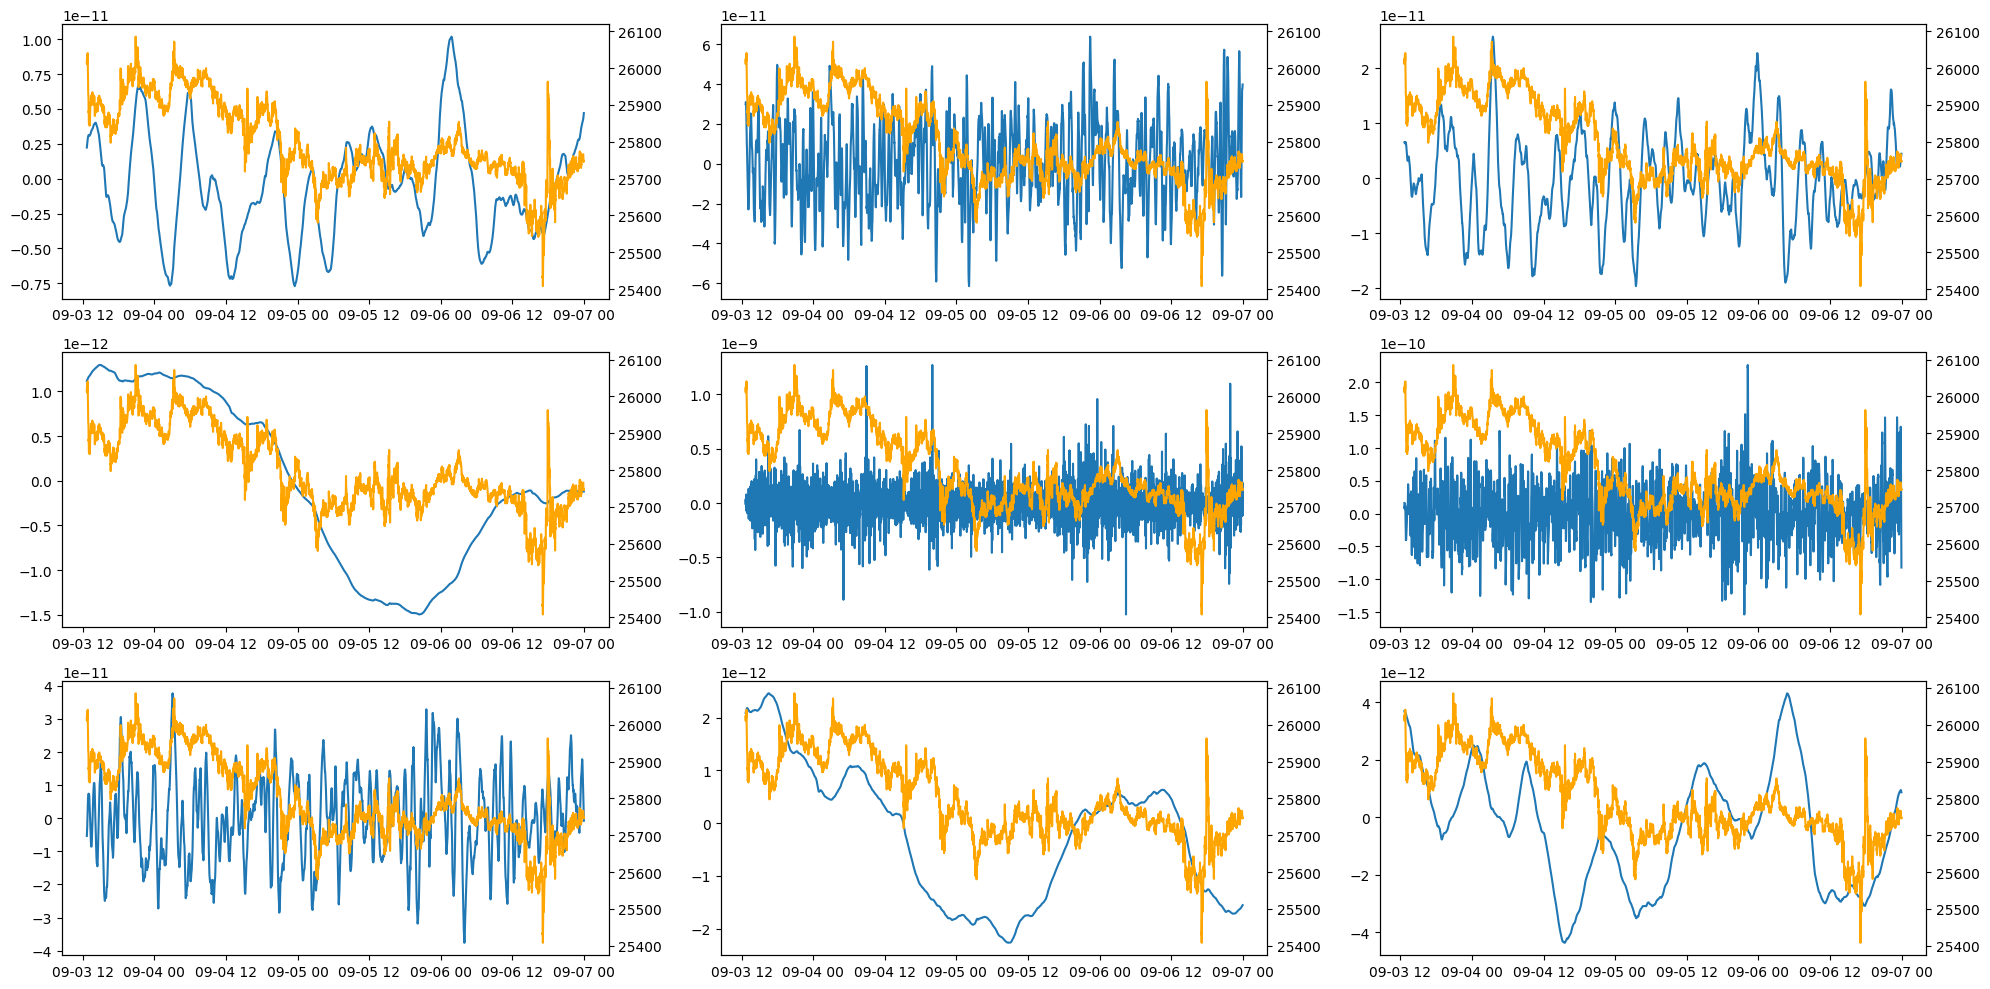

rsi_6hour.h5
rsi_12hour.h5
rsi_1min.h5
rsi_1day.h5
rsi_30min.h5
rsi_5min.h5
rsi_15min.h5
rsi_1hour.h5
rsi_3hour.h5


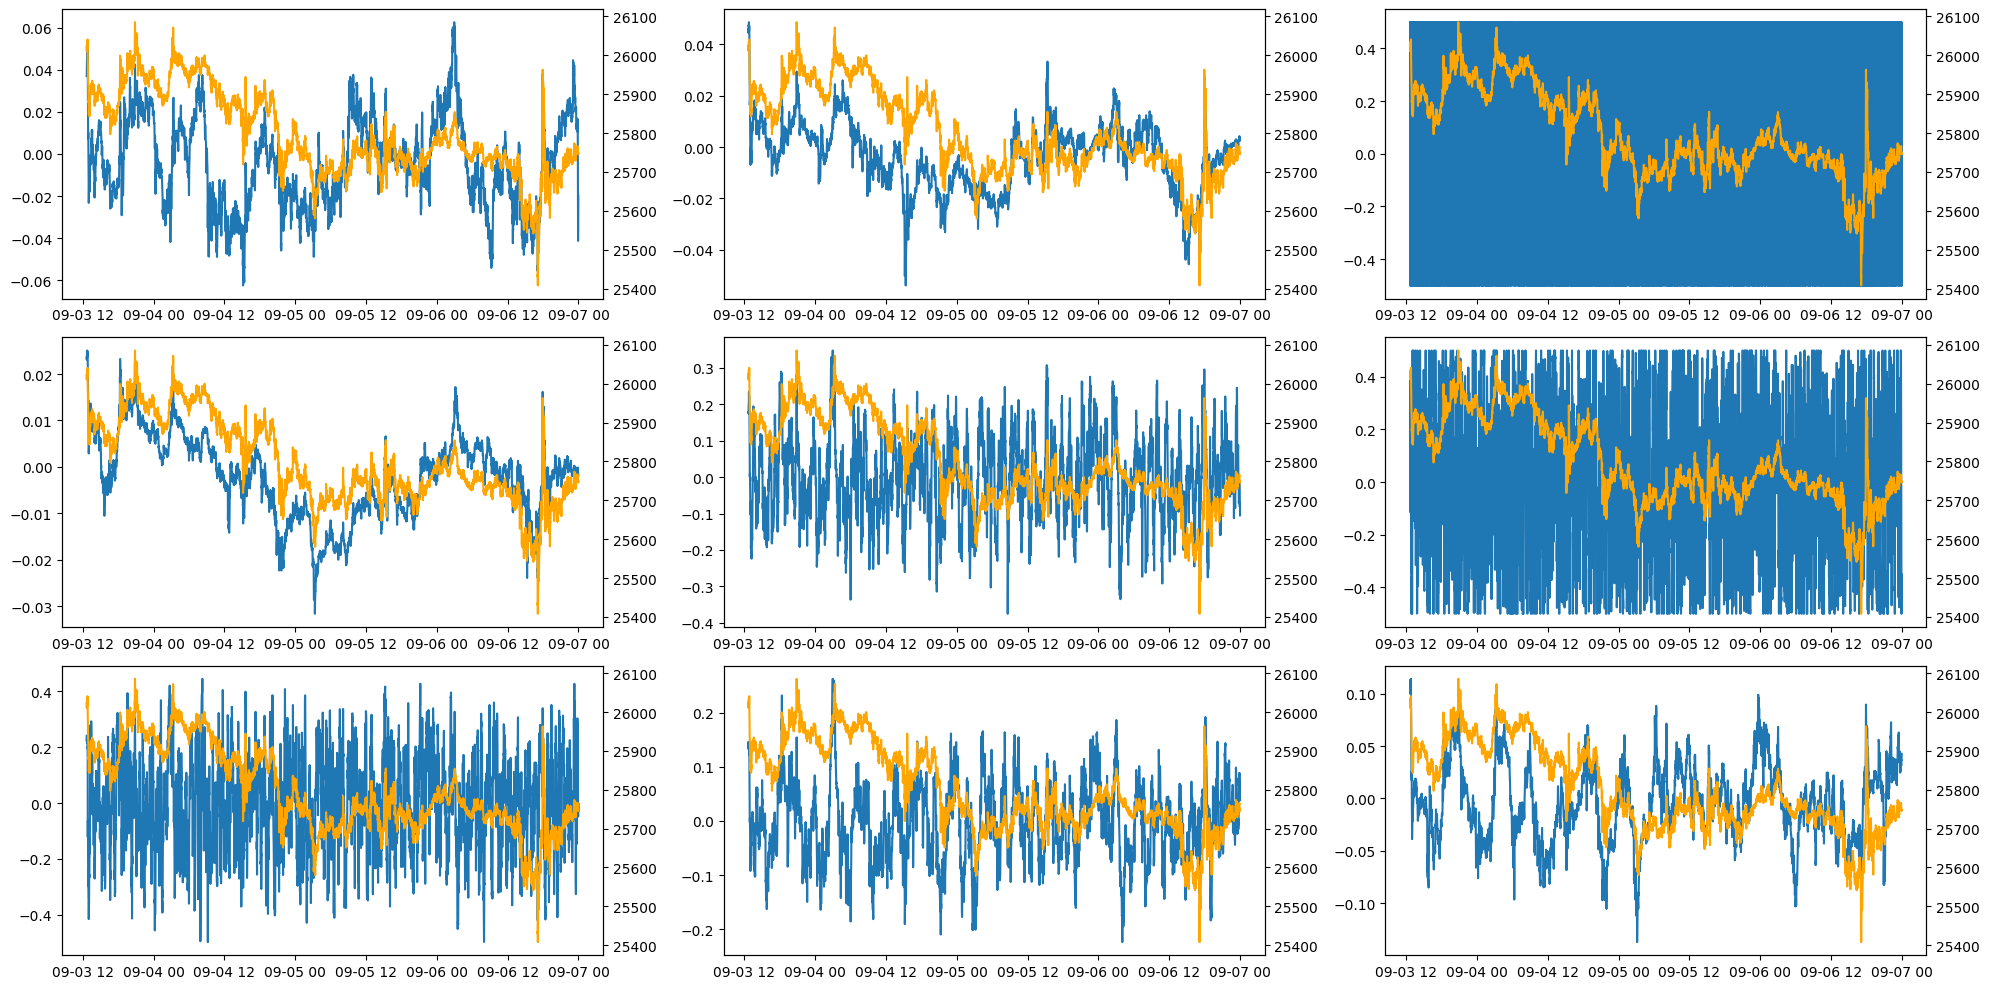

amount_spread_6hour.h5
amount_spread_15min.h5
amount_spread_1hour.h5
amount_spread_12hour.h5
amount_spread_3hour.h5
amount_spread_5min.h5
amount_spread_30min.h5
amount_spread_1min.h5
amount_spread_1day.h5


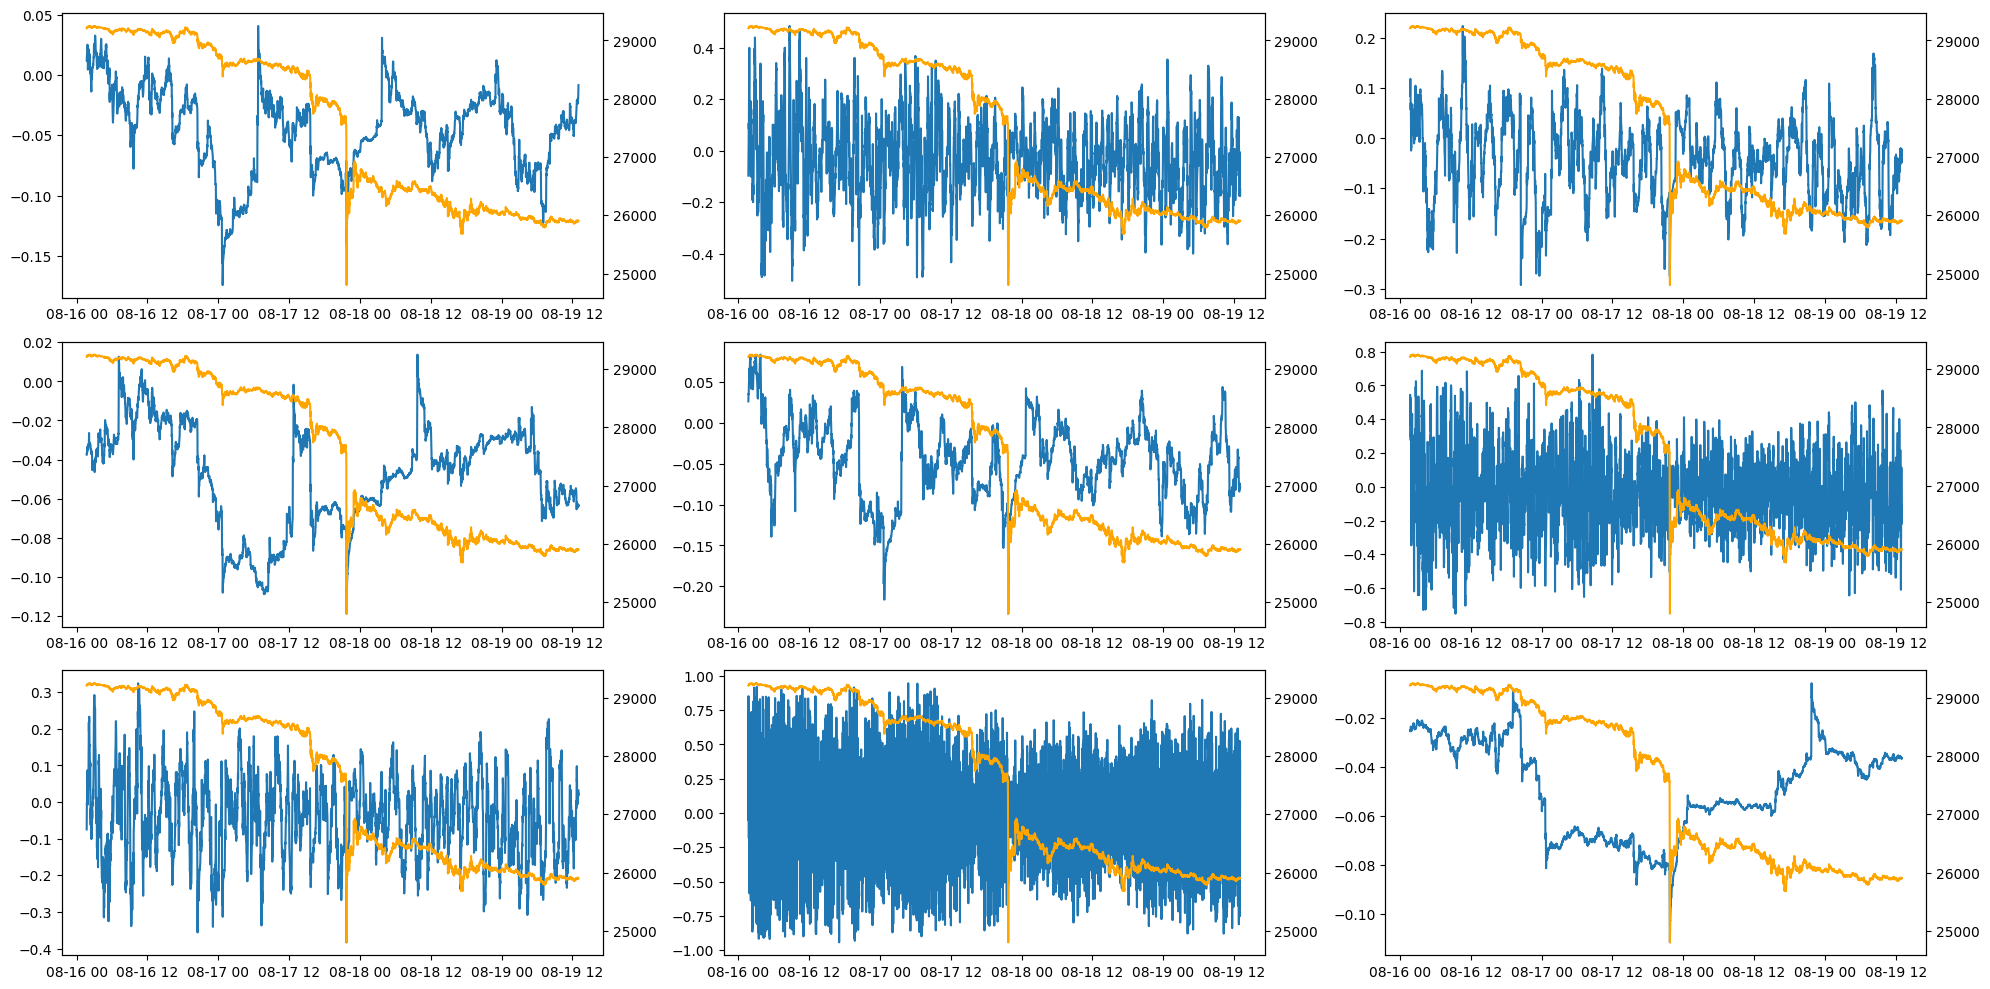

price_vol_corr_30min.h5
.DS_Store
HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /usr/local/hdf5/lib/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1990, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 405, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '/Users/johnsonhsiao/ML_Fintech/final_project/database/price_vol_corr/.DS_Store'
high_low_drawdown_6hour.h5
high_low_drawdown_12hour.h5
high_low_drawdown_30min.h5


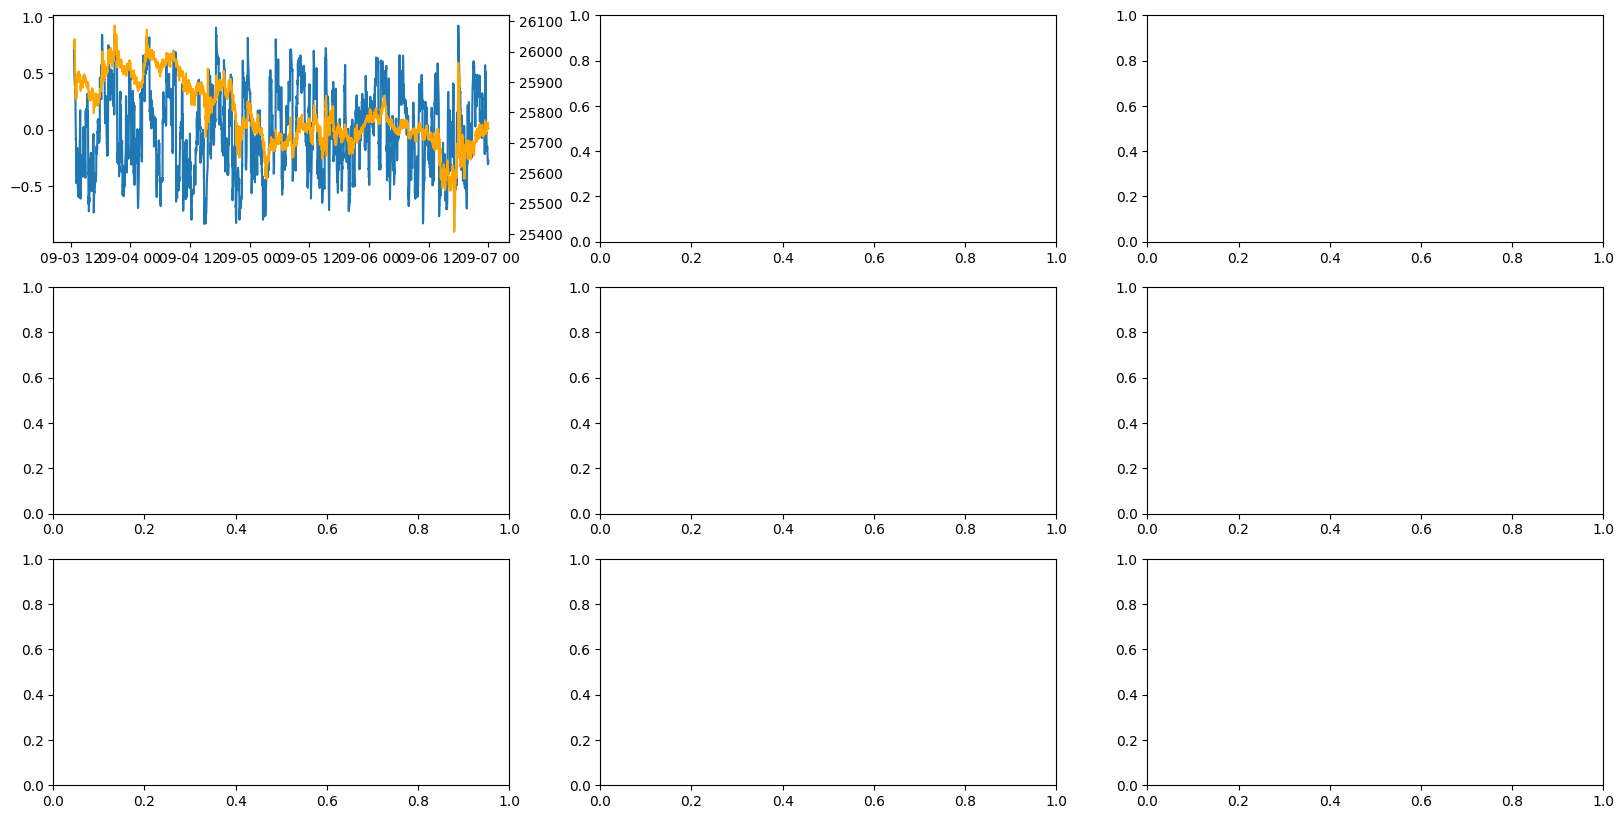

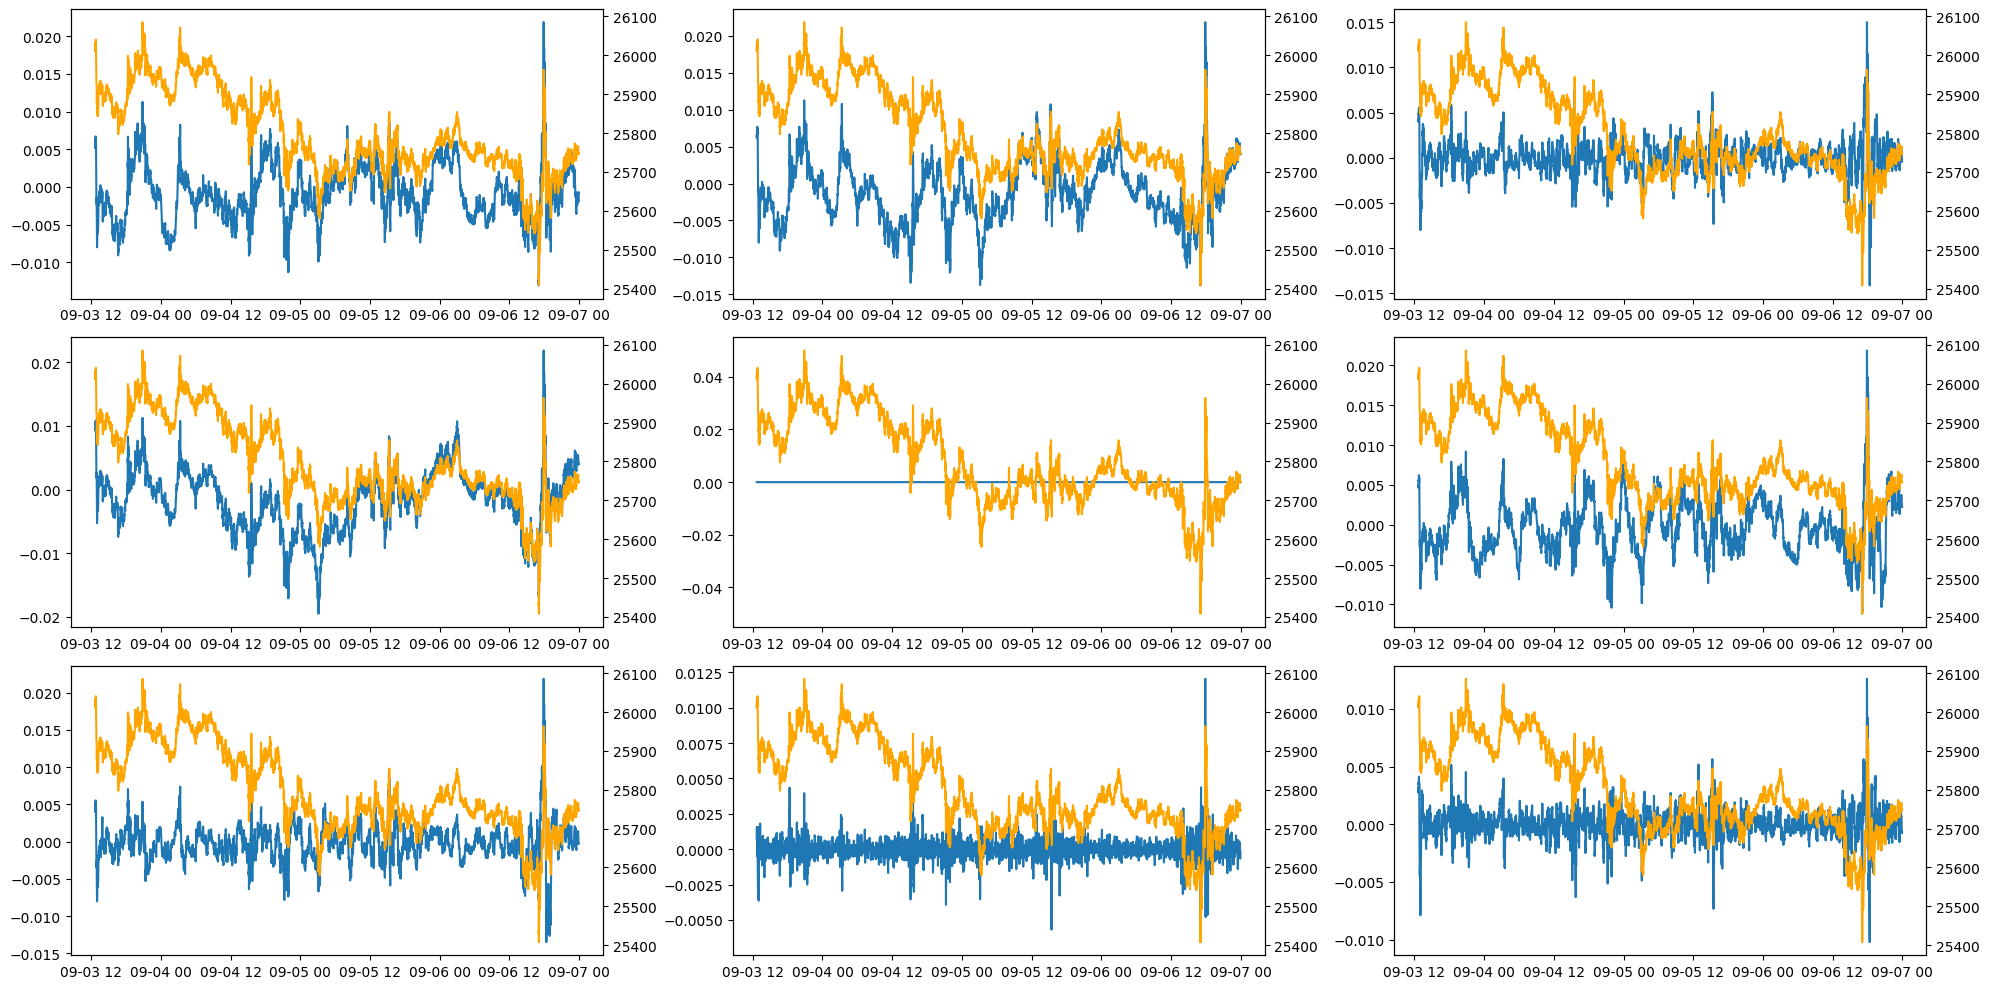

bar_rtn_sum_30min.h5
bar_rtn_sum_3hour.h5
bar_rtn_sum_12hour.h5
bar_rtn_sum_15min.h5
bar_rtn_sum_1hour.h5
bar_rtn_sum_5min.h5
bar_rtn_sum_1day.h5
bar_rtn_sum_1min.h5
bar_rtn_sum_6hour.h5


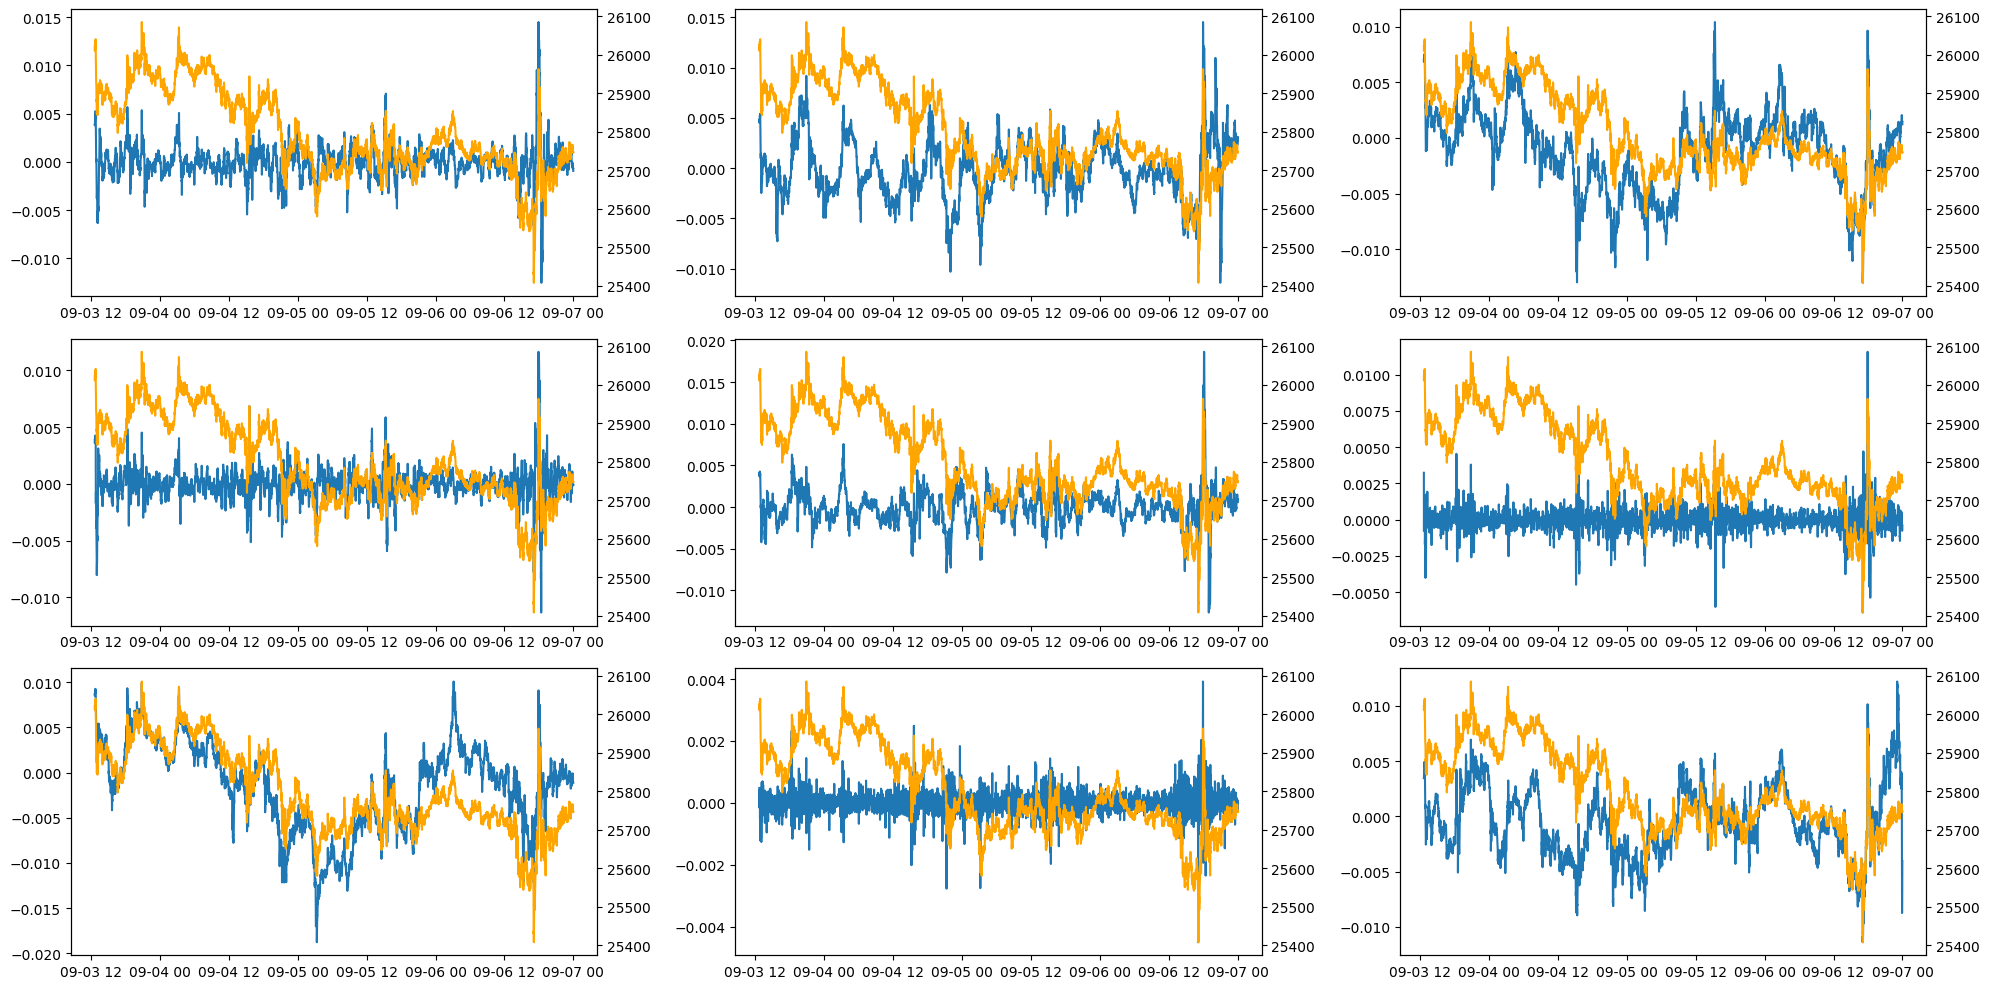

zscore_15min.h5
zscore_1hour.h5
zscore_3hour.h5
.DS_Store
HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /usr/local/hdf5/lib/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1990, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 405, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '/Users/johnsonhsiao/ML_Fintech/final_project/database/zscore/.DS_Store'
high_low_distance_3hour.h5
high_low_distance_1hour.h5
high_low_dis

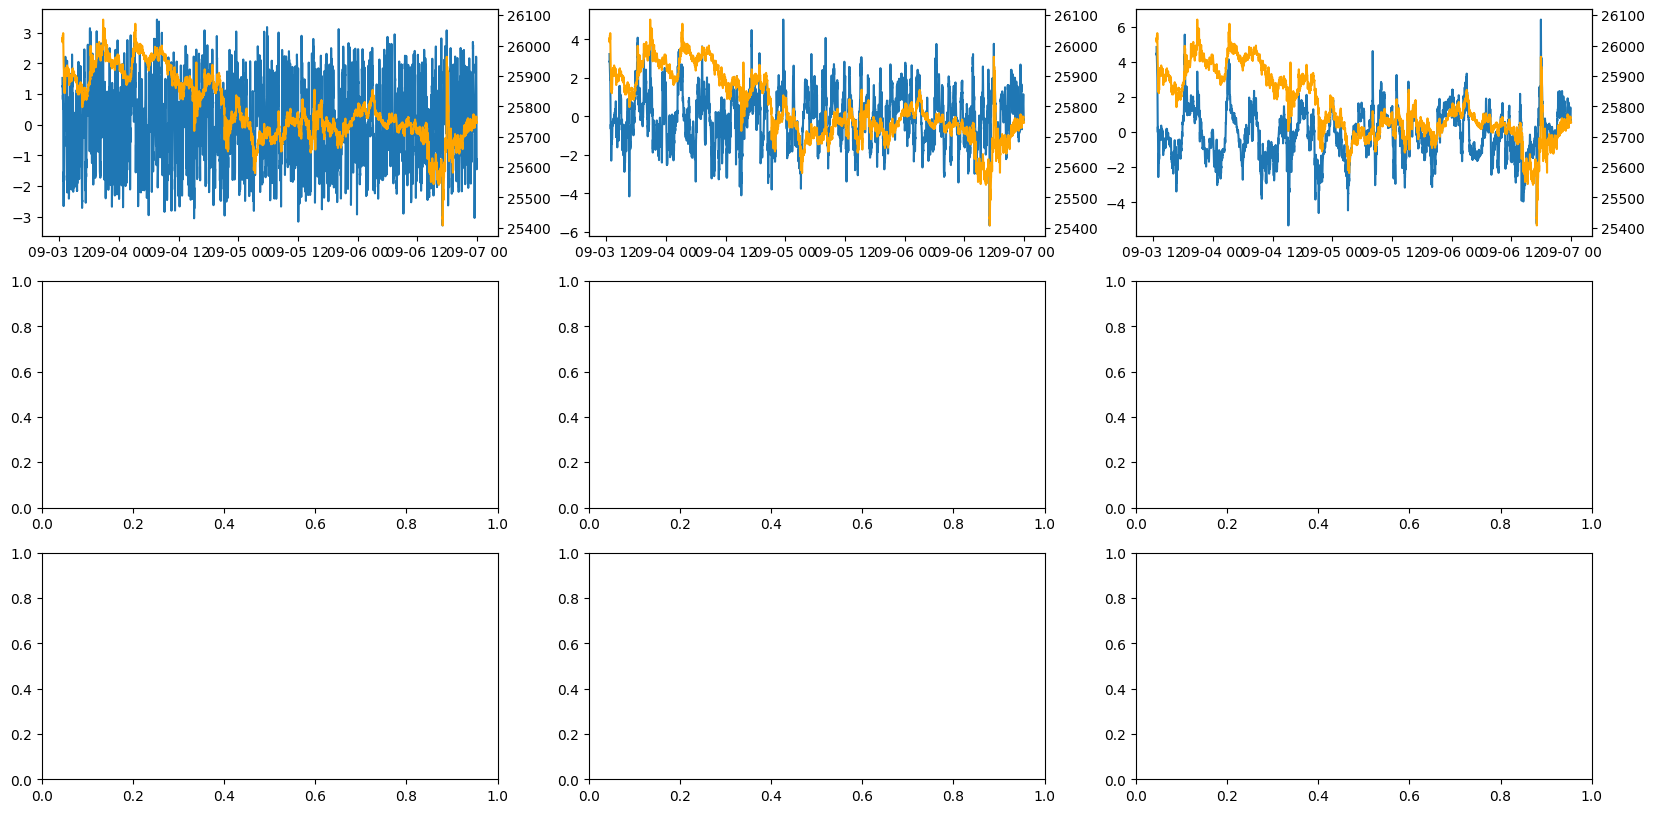

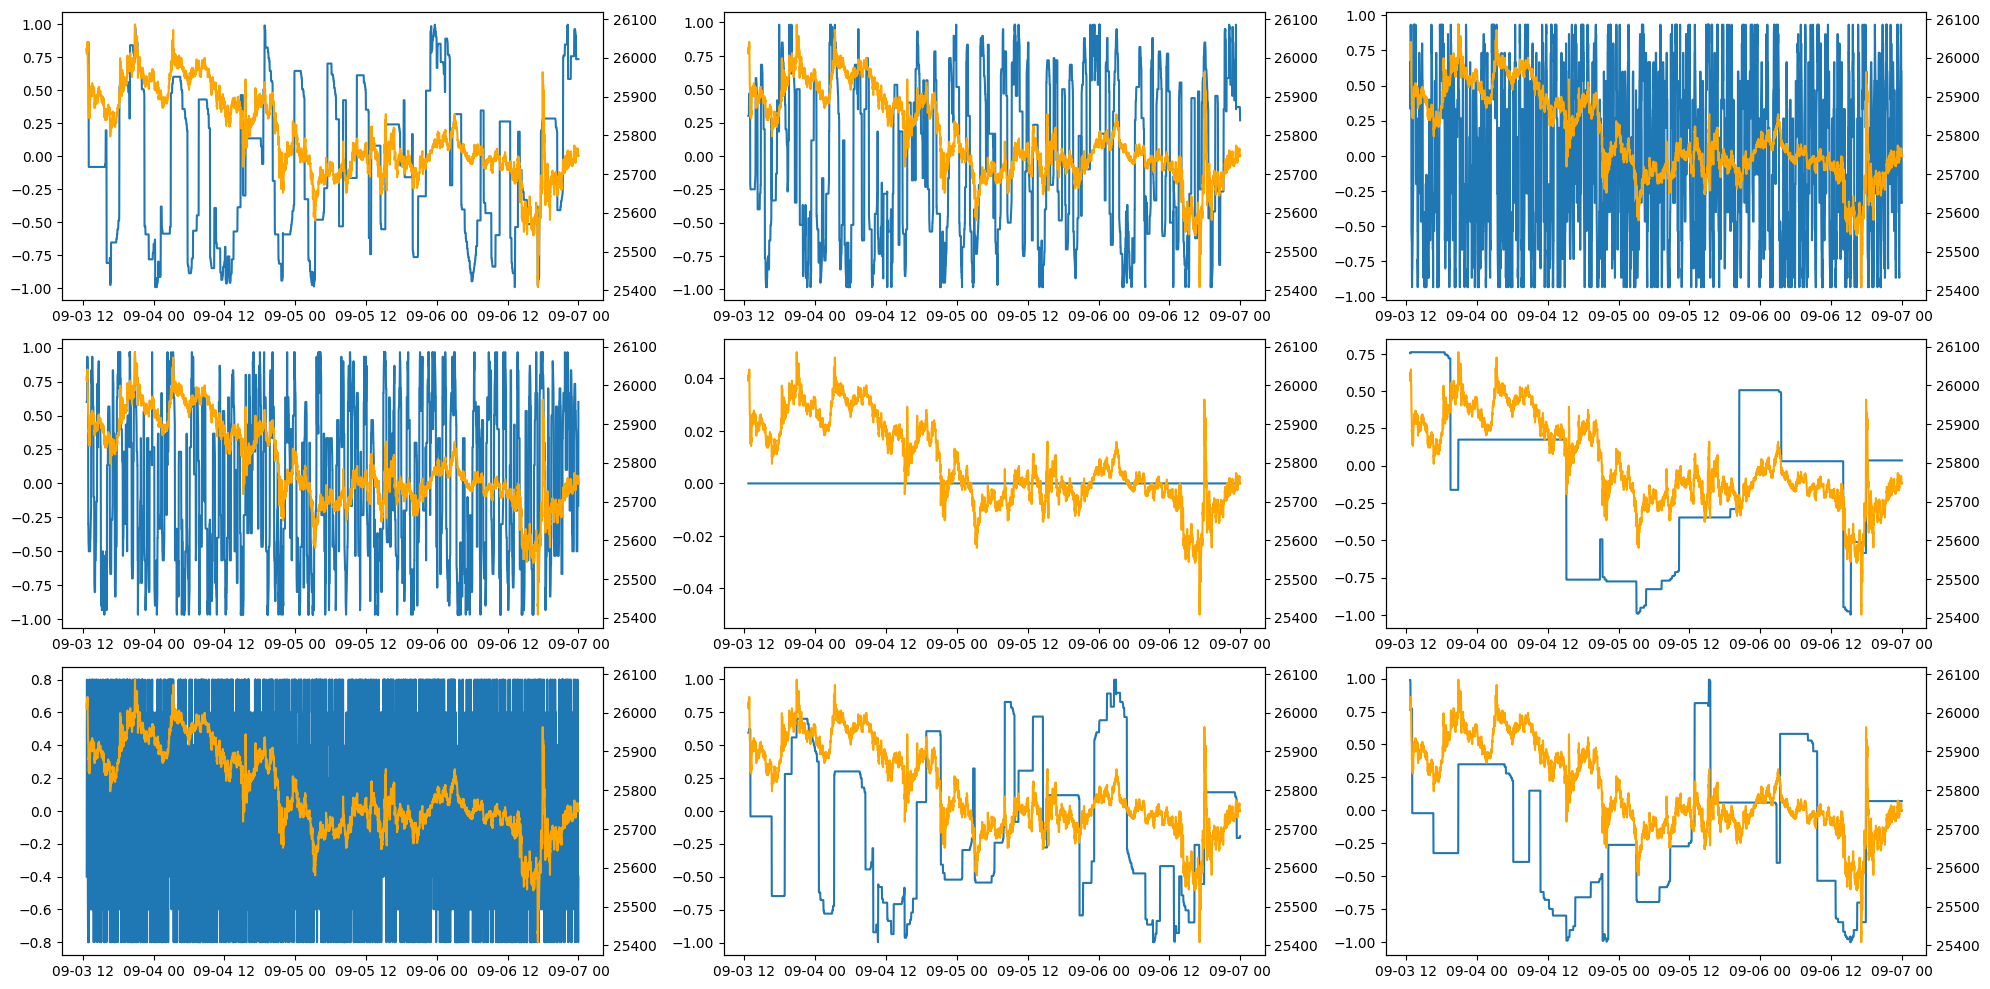

mom_15min.h5
mom_1hour.h5
mom_3hour.h5
mom_30min.h5
mom_5min.h5
mom_12hour.h5
mom_1day.h5
mom_1min.h5
mom_6hour.h5


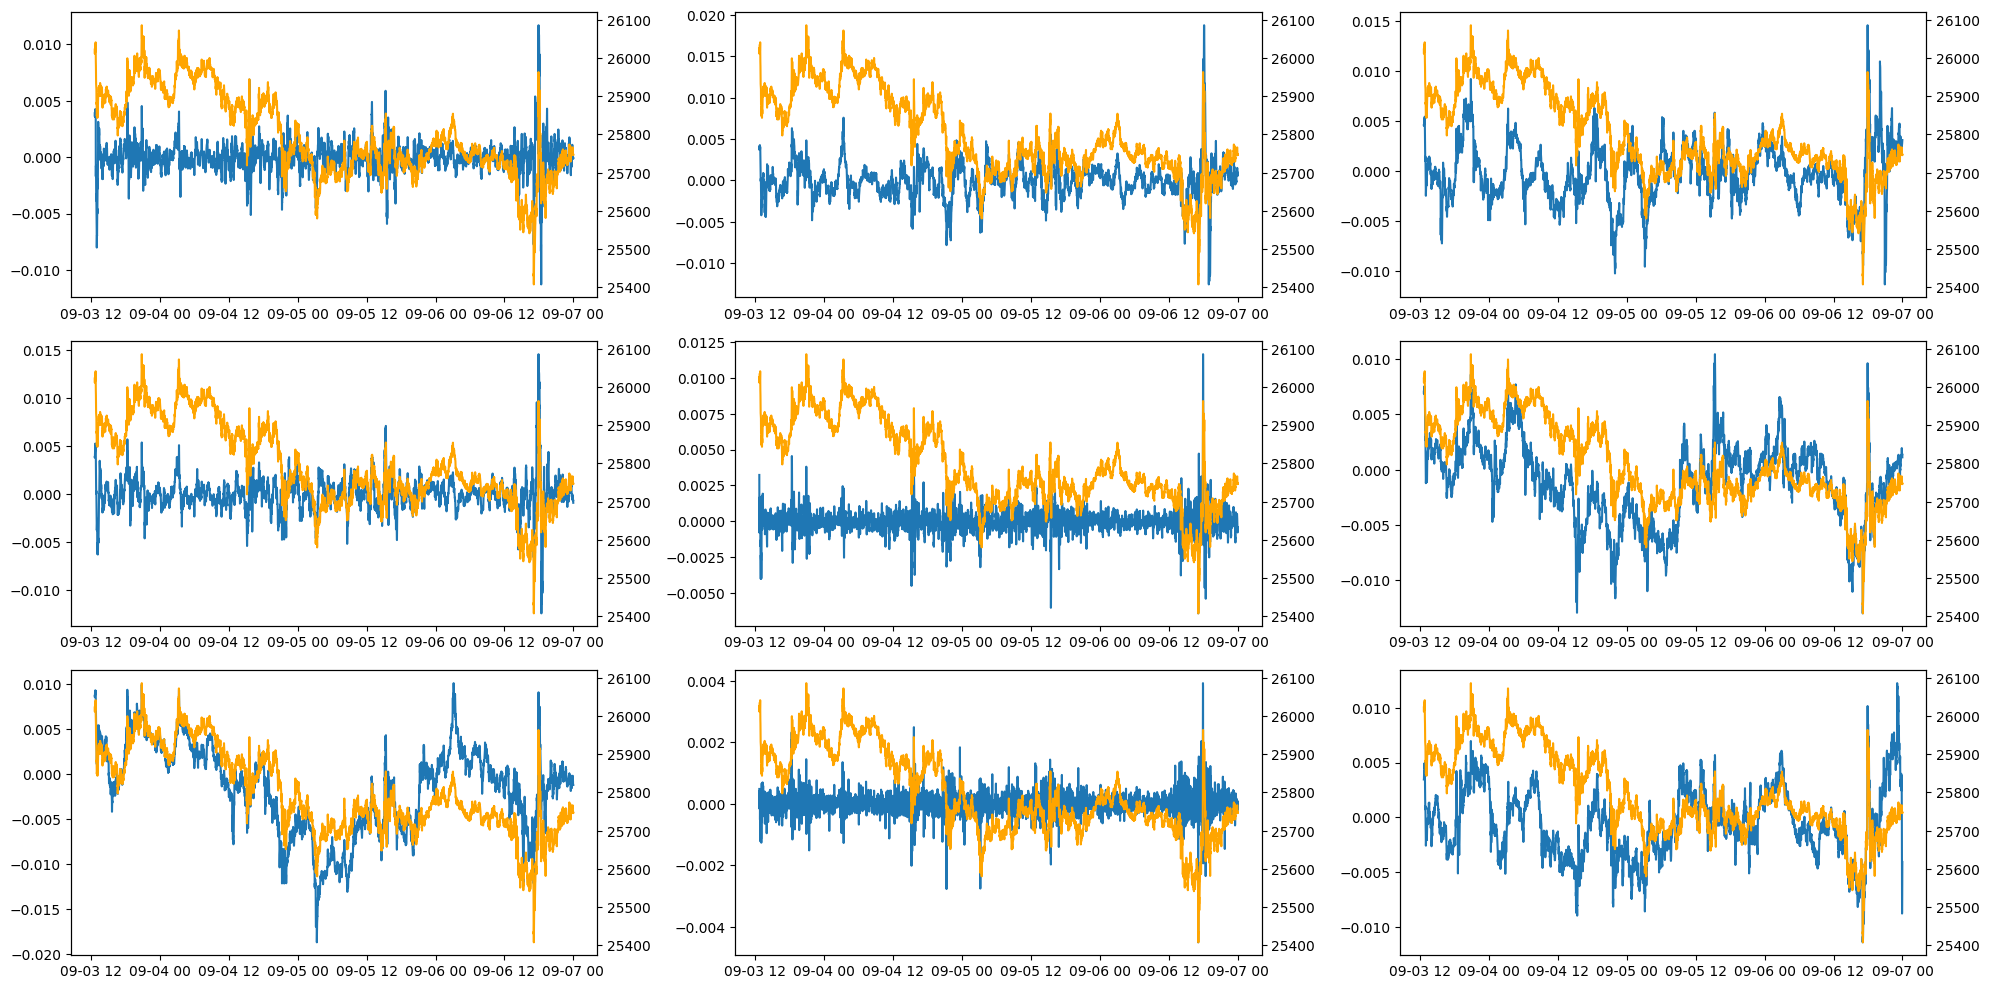

In [ ]:
factor_database = '/Users/johnsonhsiao/ML_Fintech/final_project/database/'
factor_list = candidate

for factor in factor_list:
    factor_with_diff_lbp = os.listdir(f'{factor_database}{factor}')
    try:
        # 创建一个图形，包含多个子图
        num_factors = len(factor_with_diff_lbp)
        num_cols = 3  # 每行2个子图
        num_rows = (num_factors + 1) // num_cols  # 确定子图行数

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

        # 遍历因子列表并处理数据
        for i, factor_lbp in enumerate(factor_with_diff_lbp):
            row, col = i // num_cols, i % num_cols
            ax1 = axes[row, col]

            print(factor_lbp)
            factor_data = pd.read_hdf(f'{factor_database}{factor}/{factor_lbp}')
            factor_data = factor_data.to_frame()
            factor_data = factor_data.dropna()
            factor_data = factor_data.replace({True: 1, False: -1})
            factor_data = factor_data.rename(columns={factor_data.columns[0]: factor_lbp.split('.h5')[0]})
            df = pd.concat([factor_data,data],axis=1)
            df = df.dropna()

            # 绘制折线图
            ax1.plot(df.index[-5000:], df[factor_lbp.split('.h5')[0]].iloc[-5000:])
            ax.set_title(factor_lbp.split('.h5')[0])

            ax2 = ax1.twinx()
            ax2.plot(df.index[-5000:], df['close'].iloc[-5000:], color='orange')

        # 隐藏未使用的子图
        for i in range(len(factor_with_diff_lbp), num_factors):
            row, col = i // num_cols, i % num_cols
            fig.delaxes(axes[row, col])

        # 调整子图布局
        plt.tight_layout()

        # 显示图
        plt.show()
    except Exception as e:
        print(e)

### using origin data from market, like OHLCV

模型准确率：0.5555476538794972


Text(0.5, 1.0, 'Confusion Matrix')

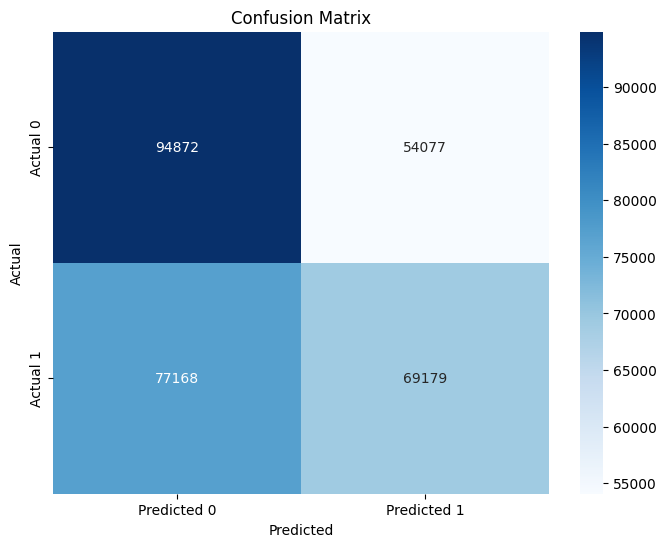

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_hdf('BTCUSDT_PERPETUAL.h5')
# data['rtn1min'] = np.where(data['close'].shift(1) - data['close'] > 0, 1, 0)
# data['rtn5min'] = np.where(data['close'].shift(5) - data['close'] > 0, 1, 0)
# data['rtn10min'] = np.where(data['close'].shift(10) - data['close'] > 0, 1, 0)
data['rtn1hr'] = np.where(data['close'].shift(60) - data['close'] > 0, 1, 0)
# data['rtn2hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
# data['rtn4hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
# data['rtn12hr'] = np.where(data['close'].shift(60*12) - data['close'] > 0, 1, 0)
# data['rtn1day'] = np.where(data['close'].shift(60*24) - data['close'] > 0, 1, 0)
# data['rtn3day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)
# data['rtn7day'] = np.where(data['close'].shift(60*24*7) - data['close'] > 0, 1, 0)

# factor_lbp = os.listdir(f'{factor_database}x_s_ratio/')
# prepared_data = [data]
# for factor_lbp in factor_lbp:
#     factor_data = pd.read_hdf(f'{factor_database}x_s_ratio/{factor_lbp}')
#     factor_data = factor_data.to_frame()
# #     factor_data = factor_data.drop(columns='pnl')
#     factor_data = factor_data.dropna()
# #     factor_data = factor_data.replace({True: 1, False: 0})
#     factor_data = factor_data.rename(columns={factor_data.columns[0]: factor_lbp.split('.h5')[0]})
#     factor_data.columns = [factor_lbp.split('.h5')[0] + col for col in factor_data.columns]
#     prepared_data.append(factor_data)
# output = pd.concat(prepared_data,axis=1)
# output = output.dropna()
data_subset = data.drop(['close_time'], axis=1)

X = data_subset.drop(columns=['rtn1hr'])
y = data_subset['rtn1hr']

# 将数据分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建XGBoost分类模型
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率：{accuracy}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

### adding another factor  ex.x_s_ratio

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def length_until_non_nan(column):
    length = 0
    for value in column:
        if not pd.isna(value):
            return length
        length += 1
    return length

data = pd.read_hdf('BTCUSDT_PERPETUAL.h5')
data['rtn1min'] = np.where(data['close'].shift(1) - data['close'] > 0, 1, 0)
data['rtn5min'] = np.where(data['close'].shift(5) - data['close'] > 0, 1, 0)
data['rtn10min'] = np.where(data['close'].shift(10) - data['close'] > 0, 1, 0)
data['rtn1hr'] = np.where(data['close'].shift(60) - data['close'] > 0, 1, 0)
data['rtn2hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn4hr'] = np.where(data['close'].shift(60*2) - data['close'] > 0, 1, 0)
data['rtn12hr'] = np.where(data['close'].shift(60*12) - data['close'] > 0, 1, 0)
data['rtn1day'] = np.where(data['close'].shift(60*24) - data['close'] > 0, 1, 0)
data['rtn3day'] = np.where(data['close'].shift(60*24*3) - data['close'] > 0, 1, 0)
data['rtn7day'] = np.where(data['close'].shift(60*24*7) - data['close'] > 0, 1, 0)

factor_lbp = os.listdir(f'{factor_database}x_s_ratio/')
prepared_data = [data]
for factor_lbp in factor_lbp:
    factor_data = pd.read_hdf(f'{factor_database}x_s_ratio/{factor_lbp}')
    factor_data = factor_data.to_frame()
#     factor_data = factor_data.drop(columns='pnl')
    length = length_until_non_nan(factor_data)
#     factor_data = factor_data.replace({True: 1, False: 0})
    factor_data = factor_data.rename(columns={factor_data.columns[0]: factor_lbp.split('.h5')[0]})
    prepared_data.append(factor_data.shift(-60))
output = pd.concat(prepared_data,axis=1)
output = output.dropna()
data_subset = output.drop(['close_time'], axis=1)

# X = data_subset.drop(columns=['rtn1hr'])
# y = data_subset['rtn1hr']

# # 将数据分成训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 创建XGBoost分类模型
# model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# # 训练模型
# model.fit(X_train, y_train)

# # 使用模型进行预测
# y_pred = model.predict(X_test)

# # 评估模型性能
# accuracy = accuracy_score(y_test, y_pred)
# print(f"模型准确率：{accuracy}")

Text(0.5, 1.0, 'Confusion Matrix')

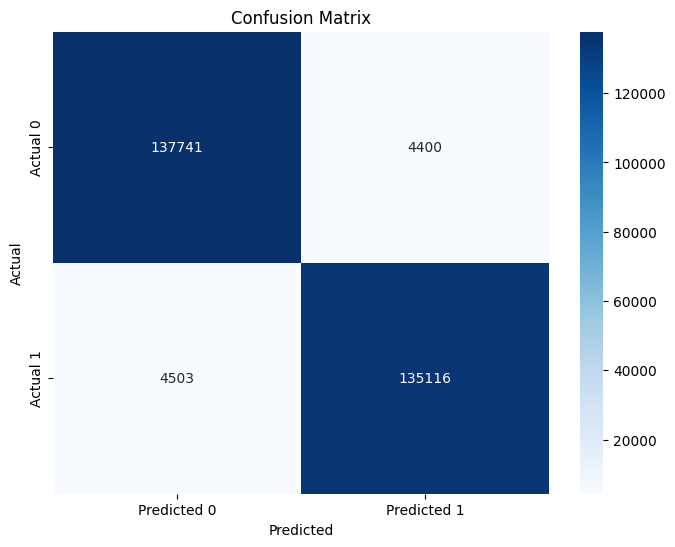

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
data_subset['rtn1min'].corr(data_subset['x_s_ratio_1hour'])

-0.025127822417156